# Credit Card Predictions

Antonio Debouse, Blake Freeman, Bodie Franklin, Eric Romero


# Summary of Resubmission Changes:


<span style='background:yellow'> 
Added to new resubmission:
</span>

* Data Meaning Type formatted into table
* df.info() added and data encoding discussed
* Missing values analysis and visual
* Duplicate check analysis
* Simple stats section reworked (previously was missing label)
* Analysis addressing outliers
* Analysis added for all charts - Everyone do their own chart
* Visualizations for attributes not related to predicted class


# Business Understanding

Credit card companies are always in search of better ways to monitor borrowers to determine if the credit card borrower will default on their credit card payments or make them in full. Defaulted credit card payments are often difficult to recoup and create losses for these companies. Defaulting on a payment is defined as not meeting the debt obligation (which is the credit card payment). Our dataset is composed of 24 attributes and 30,000 records that reflect a Taiwanese credit card borrower’s payment history over a six month period.The data was pulled from UCI machine learning repository. The purpose of the dataset is to provide attributes at different points in their payment history to identify if a credit card borrower will default on their payments or pay in full. Since the dataset captures six payment periods, it gives the credit card firm a chance to identify if default will occur or not in various billing cycles.  The effectiveness of a good classification algorithm is one that produces strong accuracy, sensitivity, and specificity scores through cross validation. If an effective classification model can be built, the credit company will have the ability to proactively monitor borrowers in various credit stages.
The significance of identifying default or not will allow the credit card to minimize their losses. If early default identification occurs, the credit card company can reduce the borrower’s credit limits or preemptively work with the borrower to create new repayment plans. Both outcomes will help the credit company reduce their losses that would occur if no action were taken.  


# Data Meaning Type

In [361]:
#Imports 
import pandas as pd
#import plotly as py #gives error?
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

<span style='background:yellow'> 
Data Meaning Types Chart Reformatted into Table:
</span>

<span style='background:yellow'> 
More detailed explaination of attributes can be found at: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
</span>


In [30]:
DataMeaningType = pd.DataFrame(
{'Attribute': ['Amount of the given credit (NT dollar):', 'Gender:', 'Education:','Marital status:','Age:','PAY_0 to PAY6:','BILL_AMT1 to BILL_AMT6:','PAY_AMT1 to PAY_AMT6:','Default payment next month:'],
'Data Type ': ['Nomminal scale', 'Categorical', 'Ordinal scale','Categorical scale','Numerical/Nomminal','Categorical scale','Nominal scale','Nominal scale','Categorical scale'],
'Description': ['Combined total of credit (amount of money) given to the individual borrower and their family.', '1 represents male and 2 represents female.', '1 represents the highest level of education and 4 would be the lowest. 1 = graduate school, 2 = university, 3 = high school and 4 = others. Values 0,5,6 are undefined.','1 = married, 2 = single, 3 = others. Value 0 is undefined.','Measures how old a borrower is.','Categorical scale','These attributes describe the past monthly payment status of each made. For example, PAY_0 represents the payment status in September 2005 and PAY_6 represents the payment status in April 2005. -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.','This value represents the amount of the credit card bill paid in each respective month','1 represents a default or missed payment. 0 represents payment made.']})
pd.set_option("max_colwidth", 3000)

DataMeaningType 

Attribute          Data Type                                                                                                                                                                                                                                                                                                                                                                   Description
0  Amount of the given credit (NT dollar):      Nomminal scale                                                                                                                                                                                                                                                                                Combined total of credit (amount of money) given to the individual borrower and their family.
1                                  Gender:         Categorical                                                                                                                                                                                                                                                                                                                                   1 represents male and 2 represents female.
2                               Education:       Ordinal scale                                                                                                                                                                                                      1 represents the highest level of education and 4 would be the lowest. 1 = graduate school, 2 = university, 3 = high school and 4 = others. Values 0,5,6 are undefined.
3                          Marital status:   Categorical scale                                                                                                                                                                                                                                                                                                                   1 = married, 2 = single, 3 = others. Value 0 is undefined.
4                                     Age:  Numerical/Nomminal                                                                                                                                                                                                                                                                                                                                              Measures how old a borrower is.
5                           PAY_0 to PAY6:   Categorical scale                                                                                                                                                                                                                                                                                                                                                            Categorical scale
6                  BILL_AMT1 to BILL_AMT6:       Nominal scale  These attributes describe the past monthly payment status of each made. For example, PAY_0 represents the payment status in September 2005 and PAY_6 represents the payment status in April 2005. -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
7                    PAY_AMT1 to PAY_AMT6:       Nominal scale                                                                                                                                                                                                                                                                                       This value represents the amount of the credit card bill paid in each respective month
8              Default payment next month:   Categorical scale                                                                                                                       

In [4]:
# import and reading of the Data set
bank_db_df = pd.read_csv("Data/bank_dataset.csv") # read in the csv file

In [6]:
bank_db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

<span style='background :yellow' >
All categorical variables in the dataset were initially in integer format. Therefore, no encoding or transformation was needed.
</span>


# Data Quality 

<span style='background :yellow' >
The data that was pulled was fairly clean to start when reviewing this data. However we did notice some factors that were not in the defined range of the data. This was apparent in categorical columns of Education and Marriage. Education had 3 additional values of 0, 5, 6  which occurred 345 times out of the 30,000 values in this column. Marriage had a value of 0 which occurred 54 times out of the 30,000 values. We addressed both these mistakes in the data by deleting them with the assumption they were mislabeled we cannot trust the accuracy of those records.
    </span>

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

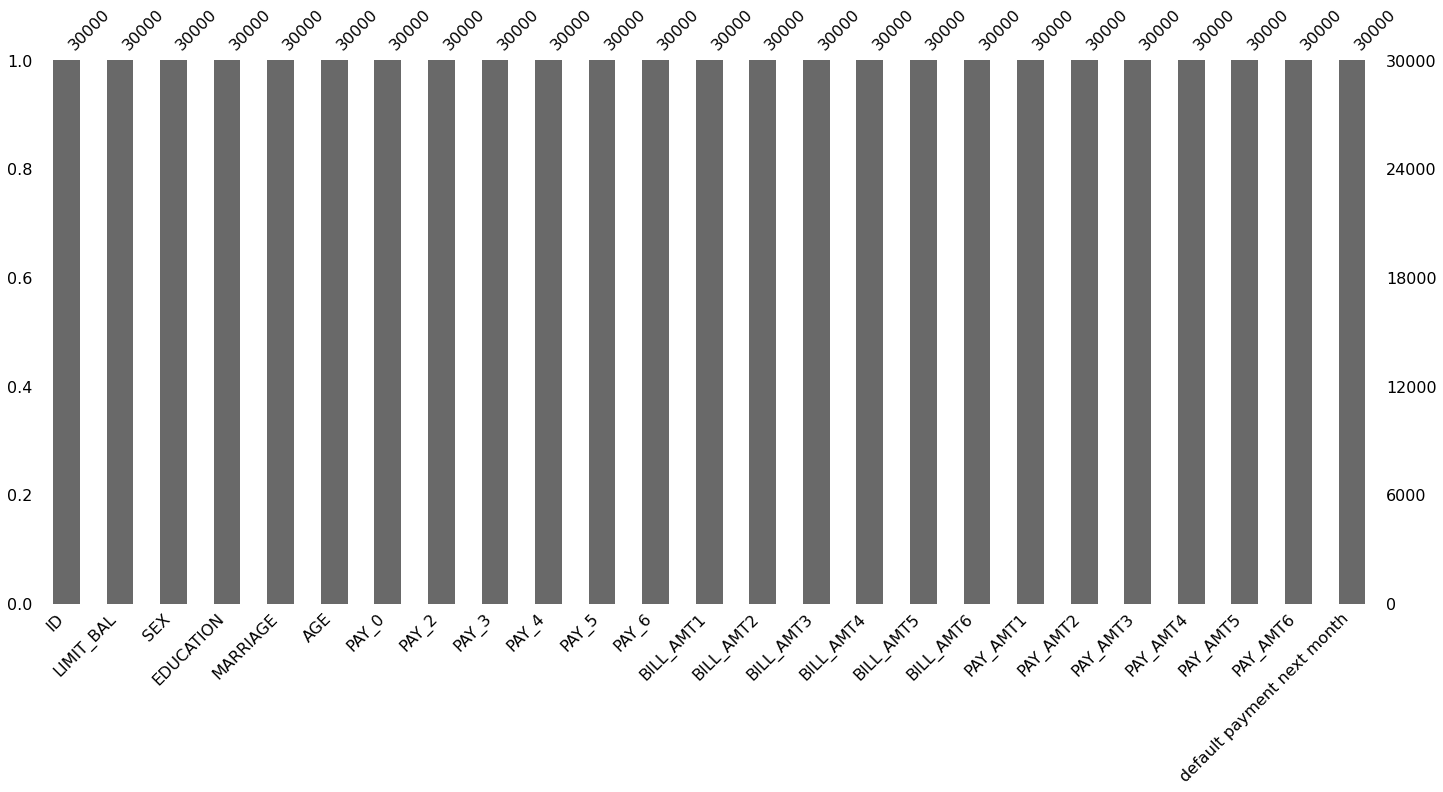

In [14]:
import pandas as pd 
import missingno as msno
msno.bar(bank_db_df)

# First look at the Data Set 
bank_db_df.head()

In [380]:
bank_db_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
S_E_M                         0
S_E                           0
S_M                           0
E_M                           0
Bill_AVG                      0
PAY_AMT_AVG                   0
dtype: i

<span style='background:yellow'>
Based on the above chart there are no missing values for any attribute in the data set.
</span>

In [382]:
bank_db_df['EDUCATION'].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
4    0.015600
Name: EDUCATION, dtype: float64

In [381]:
bank_db_df['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

<span style='background:yellow'>
However with further analysis we see that the attributes for Education and Marriage have undefined values based on the data dictionary provided. This potentially means that these records are incomplete/missing. For example, Marriage has recorded values of zero even though only values of 1-3 are defined. While Education has attributes 0,5,6 undefined. Therefore the undefined data may be removed to avoid affecting our classifications.
</span>


### Check for Duplicates

In [15]:
dup_check = bank_db_df[bank_db_df.duplicated()]
dup_check

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month]
Index: []

[0 rows x 25 columns]

<span style='background:yellow'>
There was no duplicate rows in our orginal data set based on the duplicate function check performed above.
</span>

### Outliers

In [385]:
#Code utlizted from stackoverflow link listed bleow
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
df_filtered = bank_db_df[bank_db_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

corr2 = df_filtered[df_filtered.columns[1:]].corr()['default payment next month'][:]




print("Number of outliners:",len(bank_db_df)-len(df_filtered))
print("Correlation of Data without outliners")
print("--------------------------------------------------------------------")

print(corr2)
print("--------------------------------------------------------------------")
print("Correlation of Data with outliners included")
corr = bank_db_df[bank_db_df.columns[1:]].corr()['default payment next month'][:]
print(corr)


Number of outliners: 3315
Correlation of Data without outliners
--------------------------------------------------------------------
LIMIT_BAL                    -0.147013
SEX                          -0.039169
EDUCATION                     0.027672
MARRIAGE                     -0.027778
AGE                           0.013918
PAY_0                         0.315805
PAY_2                         0.249891
PAY_3                         0.216386
PAY_4                         0.196942
PAY_5                         0.179640
PAY_6                         0.164842
BILL_AMT1                    -0.030584
BILL_AMT2                    -0.019372
BILL_AMT3                    -0.013870
BILL_AMT4                    -0.006788
BILL_AMT5                    -0.002177
BILL_AMT6                     0.003062
PAY_AMT1                     -0.106001
PAY_AMT2                     -0.103768
PAY_AMT3                     -0.094074
PAY_AMT4                     -0.081232
PAY_AMT5                     -0.084411
PAY_AMT6 

<span style='background:yellow'>
Outliers: Based on our calculations above, we identified  potential outliners 3315 possible outliers within our dataset.we experimented with the data by removing the outliers from the data to see what our correlation would be comparatively to our predicted variable of default payment next month. When outliners were removed the correlations were lower for the vast majority of variables. Based on this outcome we decided not to remove the outliners from our data set due to their a postive effect on the correlations.  
</span>


##### Noted below on the catagorical variables UCI stated

### Cleaning the Data

In [11]:
# Cleaning the Data on Unrepresented Variables
#Since both Education and Marrage have a others catagory we decided to include the vaules to in the other catagory since 
# We can not state the meaning of these.

bank_db_df['EDUCATION'] = bank_db_df['EDUCATION'].replace([0,5,6],4)


bank_db_df['MARRIAGE'] = bank_db_df['MARRIAGE'].replace([0],3)

#bank_db_df.EDUCATION.unique()
#bank_db_df.MARRIAGE.unique()

# Simple Statistics


<span style='background:yellow'> 
The Simple Statistics section was previously unlabeled therefore it should all be highlighted as new to the resubmission
</span>

In [5]:
#Data description
bank_db_df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

<span style='background:yellow'> 
In the above table, we see that the average limit balance is 167,484. It is interesting that the average credit card limit is that high of a credit limit. This may imply that the credit profile of the borrowers within the dataset are of high credit quality. Further support of this theory is supported by the fact that the dataset is imbalanced with majority of borrowers not defaulting.
Since the limit balance is so high, it is significant to look at the age distribution of the borrowers. Our mean age is 35.48, quartiles are 28 and 41. Therefore majority of the borrowers are middle age.  The youngest individual within our dataset is 21.t seems that the company is not extending credit to individuals straight out of high school.
The bill amounts seem to decrease on average in each sequential amount. I.E Bill AMT 4 reports an average of 43,262.98, while Bill AMT 6 38,871. Perhaps the decrease in bill amount can be explained by the customer paying off the bill each amount or it a combination of the credit card company reducing the borrower’s credit limit each move. Hence a lower bill amount.
 We observe the same occurrence in bill amount as pay amount. Logically, if the bill amount is smaller, then a lower payment is required.
In conclusion of analysis of table above, it seems that the credit card company is already extending credit to high quality borrowers. This is supported by the limit balances, age distribution, declining bill amount and imbalanced dataset of non-defaulted borrowers.
</span>

In [108]:
#Calculate % accounts that Defaulted (Default=1)

bank_db_df['default payment next month'].value_counts(normalize=True)


0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

<span style='background:yellow'> 
The percentage here shows how imbalanced the data set is. Majority of borrowers did not default on their payments. The significance of this imbalance is that during the modeling phase, we will have attempt techniques such as oversampling to balance our data set.
</span>

In [14]:
#Create dataset with only default accounts
Default_accts = bank_db_df[bank_db_df['default payment next month']==1]

#Create dataset for Non-Default accounts
NonD_accts = bank_db_df[bank_db_df['default payment next month']==0]

#Citation: Drew, Jake M. “Jakemdrew/DataMiningNotebooks.” GitHub, 11 Aug. 2011, github.com/jakemdrew/DataMiningNotebooks/blob/master/02.%20DataVisualization.ipynb.

In [17]:
#Aggregate Default column by Categorical Variables (SEX,EDUCATION,MARRIAGE)
Cat_group = Default_accts.groupby(by=['SEX','EDUCATION','MARRIAGE'])

print ('Total in Group who Defaulted:')
print (Cat_group["default payment next month"].count())
print ('---------------------------------------------------')
print ('Percentage of the Group who Defaulted:')
print (round((Cat_group["default payment next month"].sum()/bank_db_df["default payment next month"].count()*100),3)) #group percentage of total default amount which equals 22.12

#Citation: Drew, Jake M. “Jakemdrew/DataMiningNotebooks.” GitHub, 11 Aug. 2011, github.com/jakemdrew/DataMiningNotebooks/blob/master/02.%20DataVisualization.ipynb.

Total in Group who Defaulted:
SEX  EDUCATION  MARRIAGE
1    1          1            390
                2            506
                3             10
     2          1            643
                2            746
                3             19
     3          1            303
                2            229
                3             13
     4          1             10
                2              4
2    1          1            379
                2            748
                3              3
     2          1           1023
                2            873
                3             26
     3          1            451
                2            223
                3             18
     4          1              7
                2             12
Name: default payment next month, dtype: int64
---------------------------------------------------
Percentage of the Group who Defaulted:
SEX  EDUCATION  MARRIAGE
1    1          1           1.300
                2     

<span style='background:yellow'> 
Of all the accounts in the dataset, 22.12% defaulted (6636 total accounts). The 3.41% of married females with a university eductation who defaulted makes up the largest percentage of the defaulted group at 15.42%, while single females with a university are the second highest group to default(2.91%) accounting for 13.15% of the defaults, followed by the single female with a graduate school education default rate of 2.49% to account for 11.26% of total defaults.
The 0.013% of the single males with an "other" education group that defaulted makes up the smallest portion of the defaulted group at 5.877e-4%, second is the married females with an "other" education group who default rate is 0.023%, followed by a tie for the third lowest default rate at 0.033% between graduated educated males with an "other" martial status and married males with an "other" education.
</span>

In [18]:
#Create summary statistics
df_sub = bank_db_df[['SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']]
df_subd = Default_accts[['SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']]
df_subnond = NonD_accts[['SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']]

print (round(df_sub.describe(),2))
print ('Median values for AGE and LIMIT_BAL')
print (df_sub.median())
print('------------------------------------------------------')
print('AGE and Limit Balance on Defaulted accounts')
print (round(df_subd.describe()),2)
print ('Median values')
print (df_subd.median())
print('------------------------------------------------------')
print('AGE and Limit Balance on Non-Defaulted accounts')
print (round(df_subnond.describe(),2))
print (df_subnond.median())

            SEX  EDUCATION  MARRIAGE       AGE   LIMIT_BAL
count  30000.00   30000.00  30000.00  30000.00    30000.00
mean       1.60       1.84      1.56     35.49   167484.32
std        0.49       0.74      0.52      9.22   129747.66
min        1.00       1.00      1.00     21.00    10000.00
25%        1.00       1.00      1.00     28.00    50000.00
50%        2.00       2.00      2.00     34.00   140000.00
75%        2.00       2.00      2.00     41.00   240000.00
max        2.00       4.00      3.00     79.00  1000000.00
Median values for AGE and LIMIT_BAL
SEX               2.0
EDUCATION         2.0
MARRIAGE          2.0
AGE              34.0
LIMIT_BAL    140000.0
dtype: float64
------------------------------------------------------
AGE and Limit Balance on Defaulted accounts
          SEX  EDUCATION  MARRIAGE     AGE  LIMIT_BAL
count  6636.0     6636.0    6636.0  6636.0     6636.0
mean      2.0        2.0       2.0    36.0   130110.0
std       0.0        1.0       1.0    10.0   11

In [8]:
# Gender (1 = male; 2 = female) 
Gender = bank_db_df.groupby('SEX')['ID'].nunique()
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
EDUCATION = bank_db_df.groupby('EDUCATION')['ID'].nunique()
# Marital status (1 = married; 2 = single; 3 = others)
MARRIAGE = bank_db_df.groupby('MARRIAGE')['ID'].nunique()
print(Gender)
print(EDUCATION)
print(MARRIAGE)

#based on this documentaion there are addtional variables in Education and Marital Status

### purposed code from Stack Overflow for this.

SEX
1    11888
2    18112
Name: ID, dtype: int64
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: ID, dtype: int64
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: ID, dtype: int64


<span style='background:yellow'> 
COMMENT NEEDED
</span>

In [10]:
#Creating New Dataframe to munpluate the Data for PCA
bank_db_df2 = bank_db_df
#bank_db_df2

In [11]:
#Creating a concatenated columns to see if we can draw more correlations
concat_df = bank_db_df2['SEX'].map(str) + bank_db_df2['EDUCATION'].map(str) + bank_db_df2['MARRIAGE'].map(str)
concat_df2 = bank_db_df2['SEX'].map(str) + bank_db_df2['EDUCATION'].map(str)
concat_df3 = bank_db_df2['SEX'].map(str) + bank_db_df2['MARRIAGE'].map(str)
concat_df4 = bank_db_df2['EDUCATION'].map(str) + bank_db_df2['MARRIAGE'].map(str)

In [44]:
bank_db_df_corr = bank_db_df2.drop(["ID"],axis=1)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

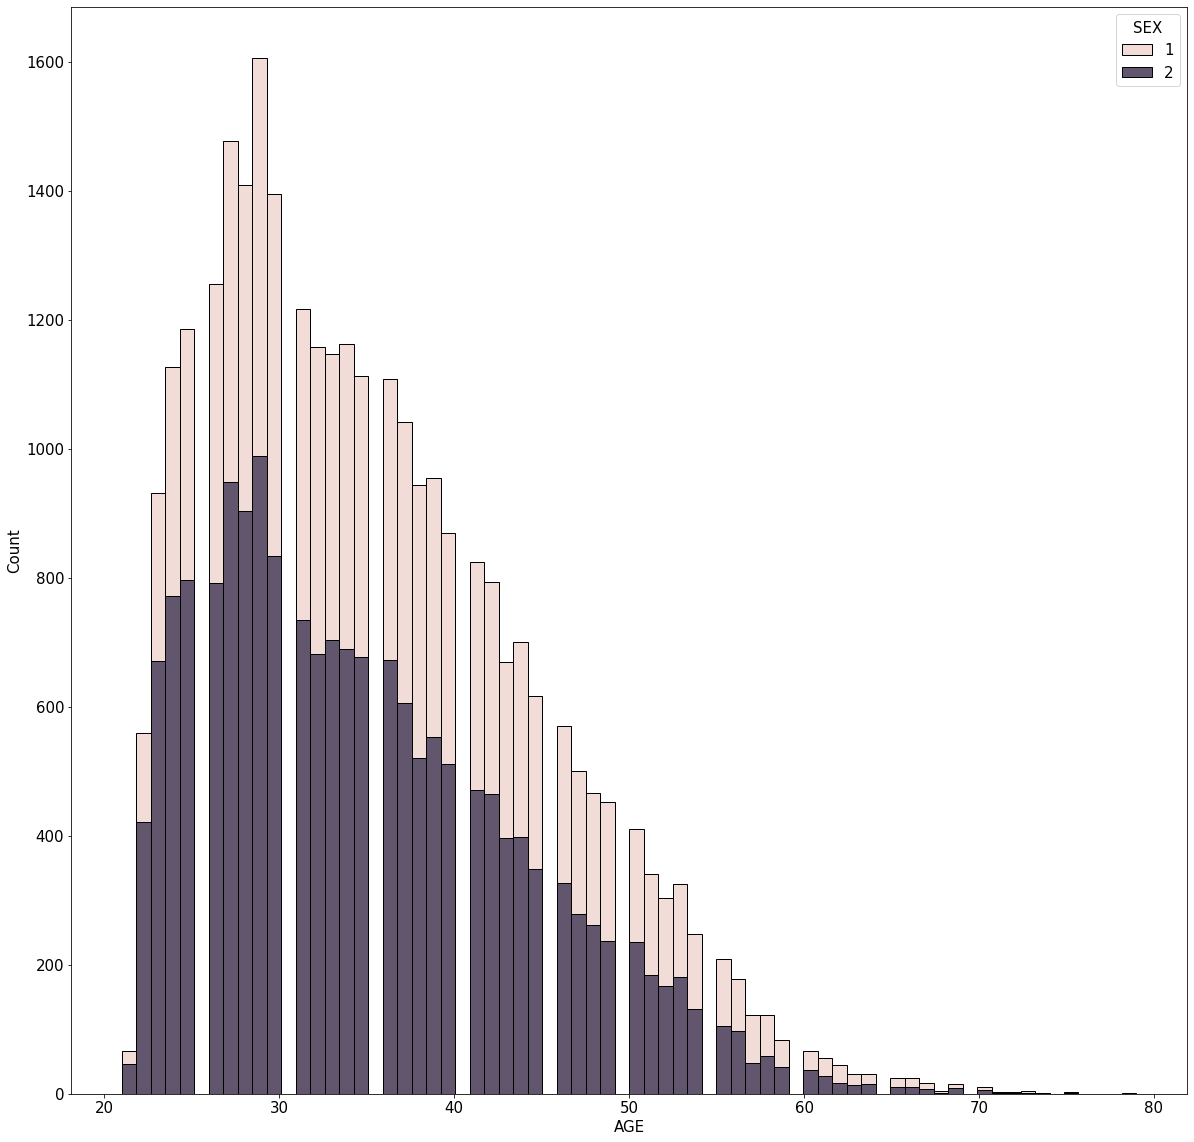

In [135]:
df_sub_comp5 = bank_db_df[["MARRIAGE","AGE","SEX"]]
sns.histplot(data=df_sub_comp5, x="AGE", hue="SEX", multiple="stack")

<span style='background:yellow'> 
Initially looking at simple counts of age and gender we find that the records have a significant right skew in age peaking around 30 years old for the average client. We also find the records to be heavily more male than female for nearly all ages.
</span>

# Visualize Attributes

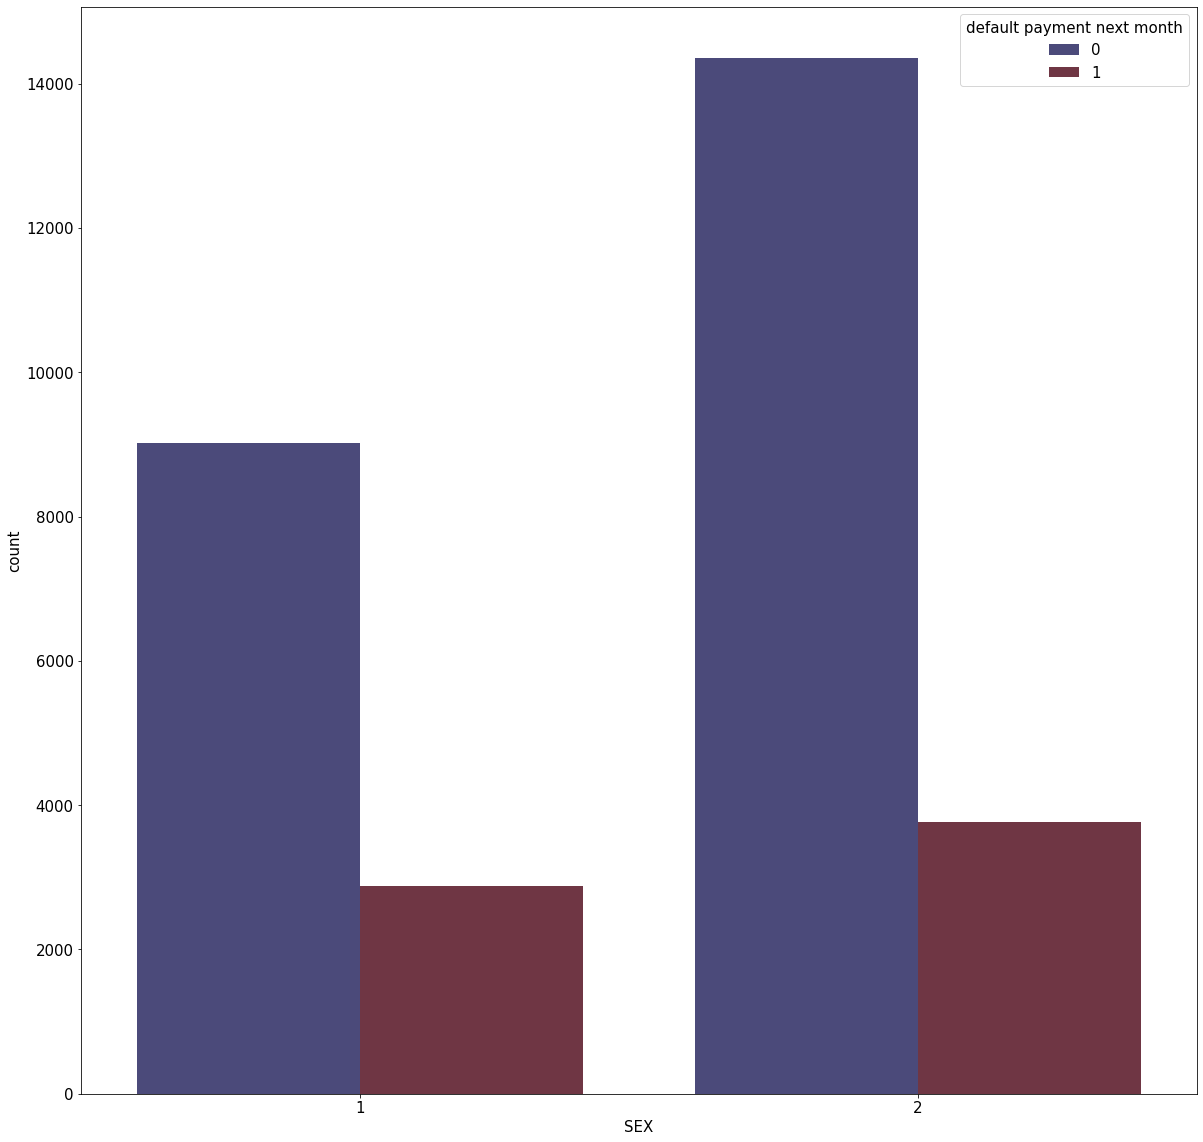

In [324]:
df_sub_comp8 = bank_db_df[["default payment next month","SEX"]]
df_sub_comp8
g= sns.countplot(data=df_sub_comp8, x="SEX", hue="default payment next month",palette='icefire')

<span style='background:yellow'> 
From the bar graph above, we see that the total number of defaults per sex is about equal, but on a percentage basis female have a lower default rate (20% vs 24%). It is interesting because this may suggest that sex impacts defaulting. In our opinion, a bar graph best illustrates this finding.
</span>

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

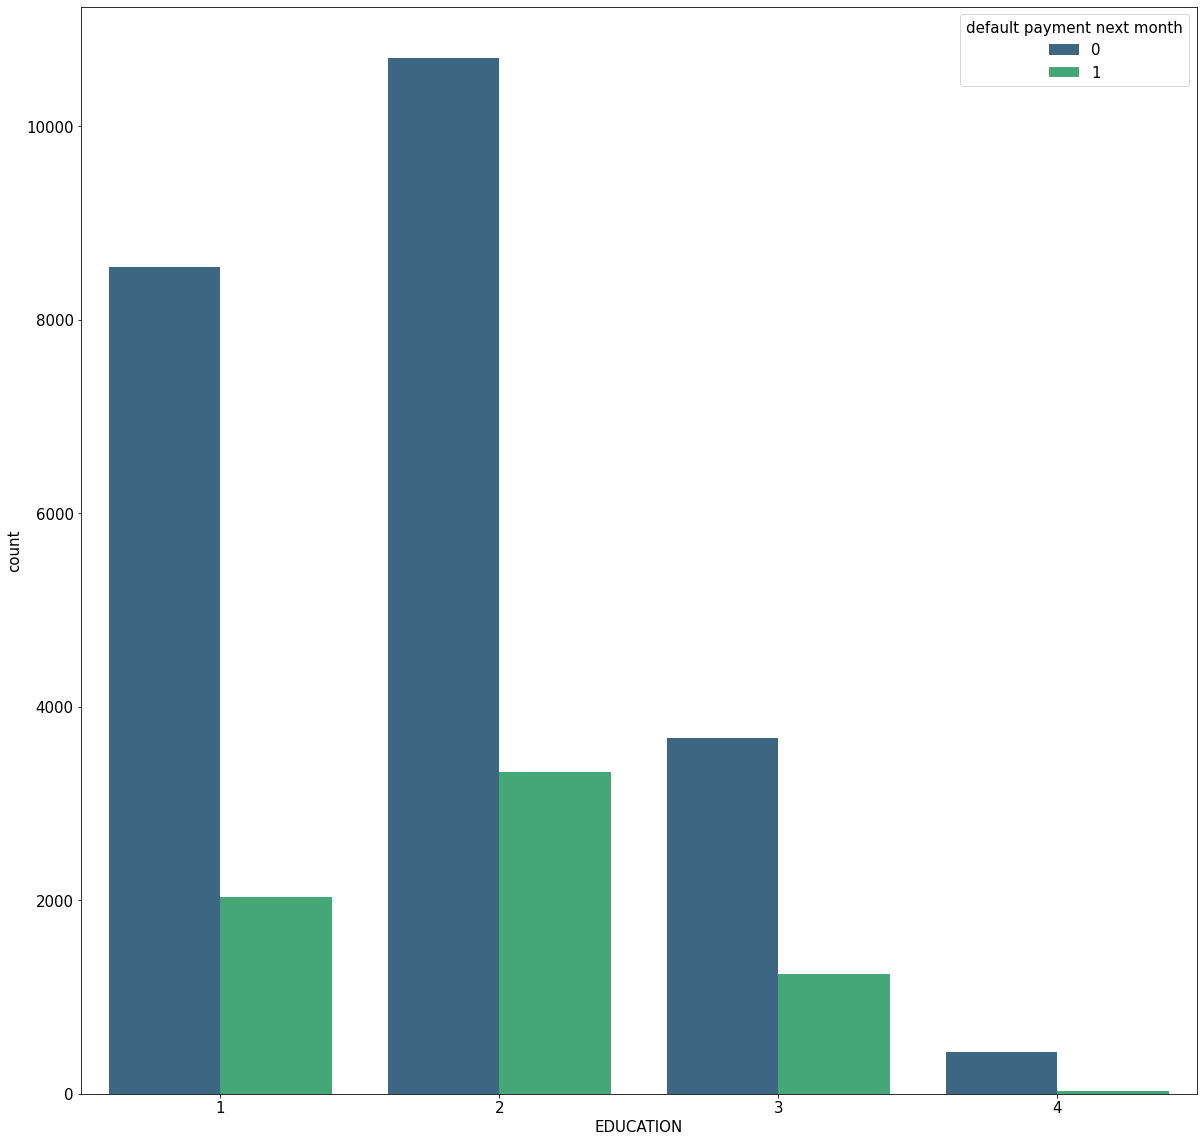

In [320]:
df_sub_comp6 = bank_db_df[["default payment next month","EDUCATION"]]
df_sub_comp6
sns.countplot(data=df_sub_comp6, x="EDUCATION", hue="default payment next month",palette='viridis')

<span style='background:yellow'> 
The bar chart above shows education broken down by default or not. The graph illustrates that most defaults are within Education levels 1 & 2. This is interesting because education levels 1 & 2 are the highest level of education. Perhaps the defaults are concentrated in levels because the borrowers have large amount of student debt. Therefore, these borrowers are unable to make their credit card payments. There are virtually no defaults within education level 4 which is other.
</span>

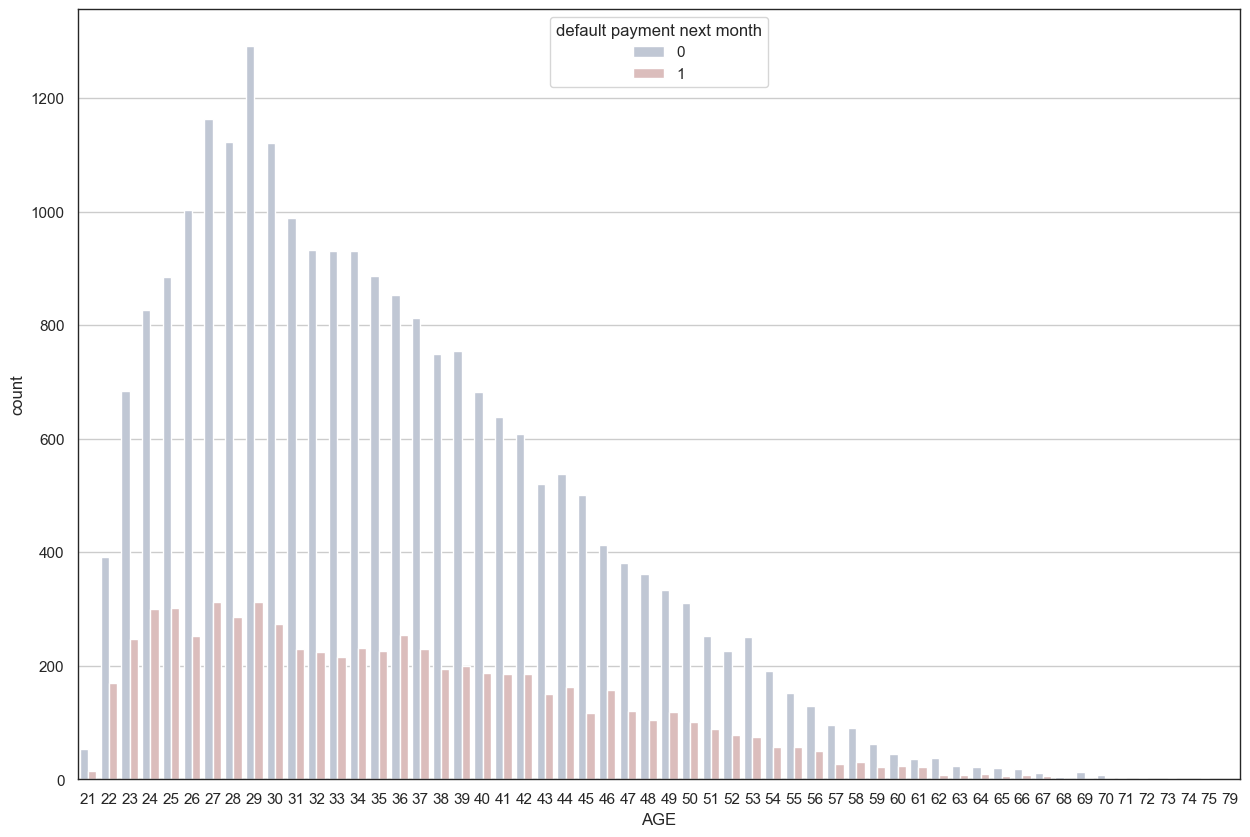

In [372]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale = 1,style='whitegrid')
df_sub_comp7 = bank_db_df[["default payment next month","AGE"]]
df_sub_comp7
g= sns.countplot(data=df_sub_comp7, x="AGE", hue="default payment next month",palette='vlag')


<span style='background:yellow'> 
The graph above illustrates age distribution in relation to defaulting.  We see that borrowers are mostly middle age. It appears that as the age increases of the borrowers, the higher likelihood the borrower is less likely to default. This observation is based on the declining default percentage of the age. Age may help us predict if a borrower will default or not. The assumption of this is that older borrowers have had a longer time to establish their credit and build up their assets.
</span>

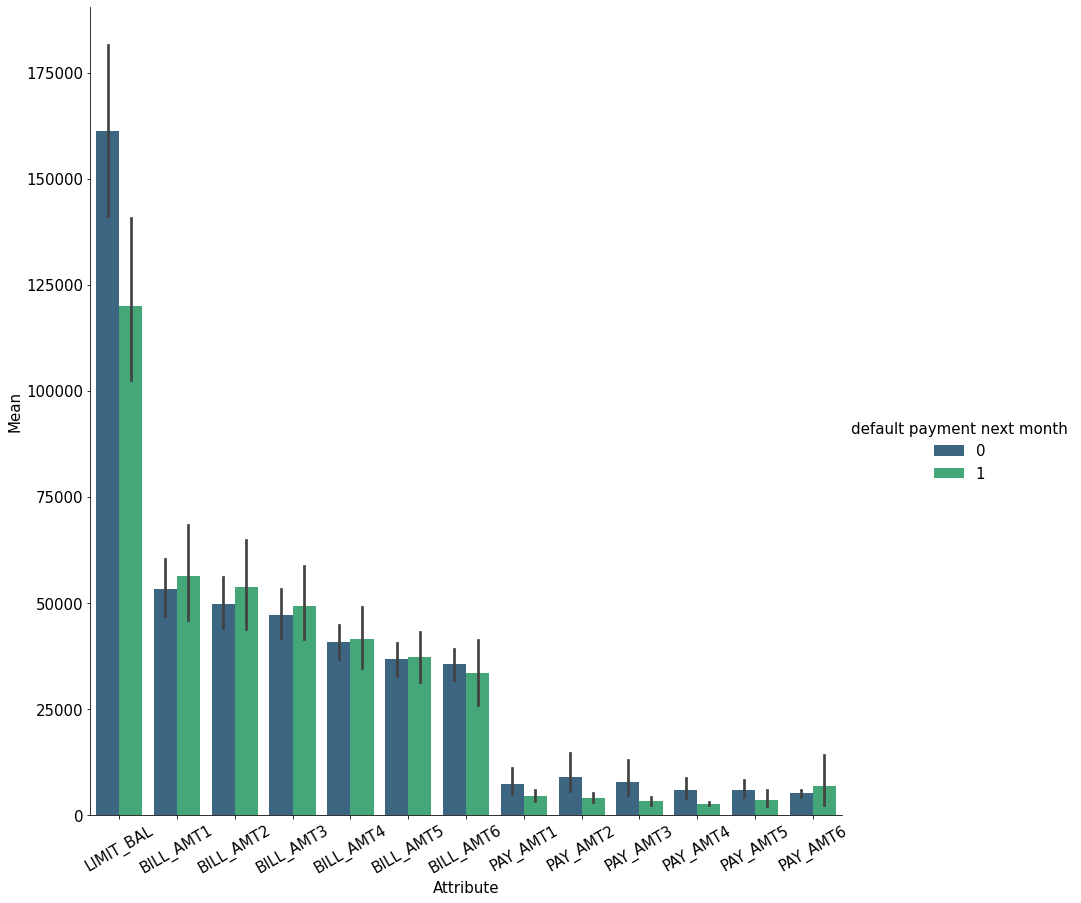

In [326]:
# Group-By for the data by the Catagorical Variables - Noticed there were groups that were not defined by the data set  
attr_group_means = bank_db_df.groupby(['SEX','EDUCATION','MARRIAGE','default payment next month']).mean()
attr_group_means = attr_group_means.reset_index()

BILL_group_means = pd.melt(attr_group_means, id_vars=['default payment next month'], value_vars=['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6',
                                                       'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',], ignore_index=True, var_name='Attribute', value_name='Mean')

g = sns.catplot(x='Attribute', y='Mean', hue='default payment next month', data=BILL_group_means, kind='bar', height=12,palette='viridis')
g.set_xticklabels(rotation=30)

<span style='background:yellow'> 
In the graph above, we calculated the mean of each respective balance variable. This graph shows that nearly every default has a lower average bill amount and pay amount with exception of bill 1. Bill 1 has a higher average default amount. This suggest that after the first bill amount, the credit card company began reducing credit limits to the borrower. This is in line with the idea that the company already has strong credit regulating practices since their default percentage is low.  Potentiality, bill amount one can be used as a predictor for defaulting.
</span>

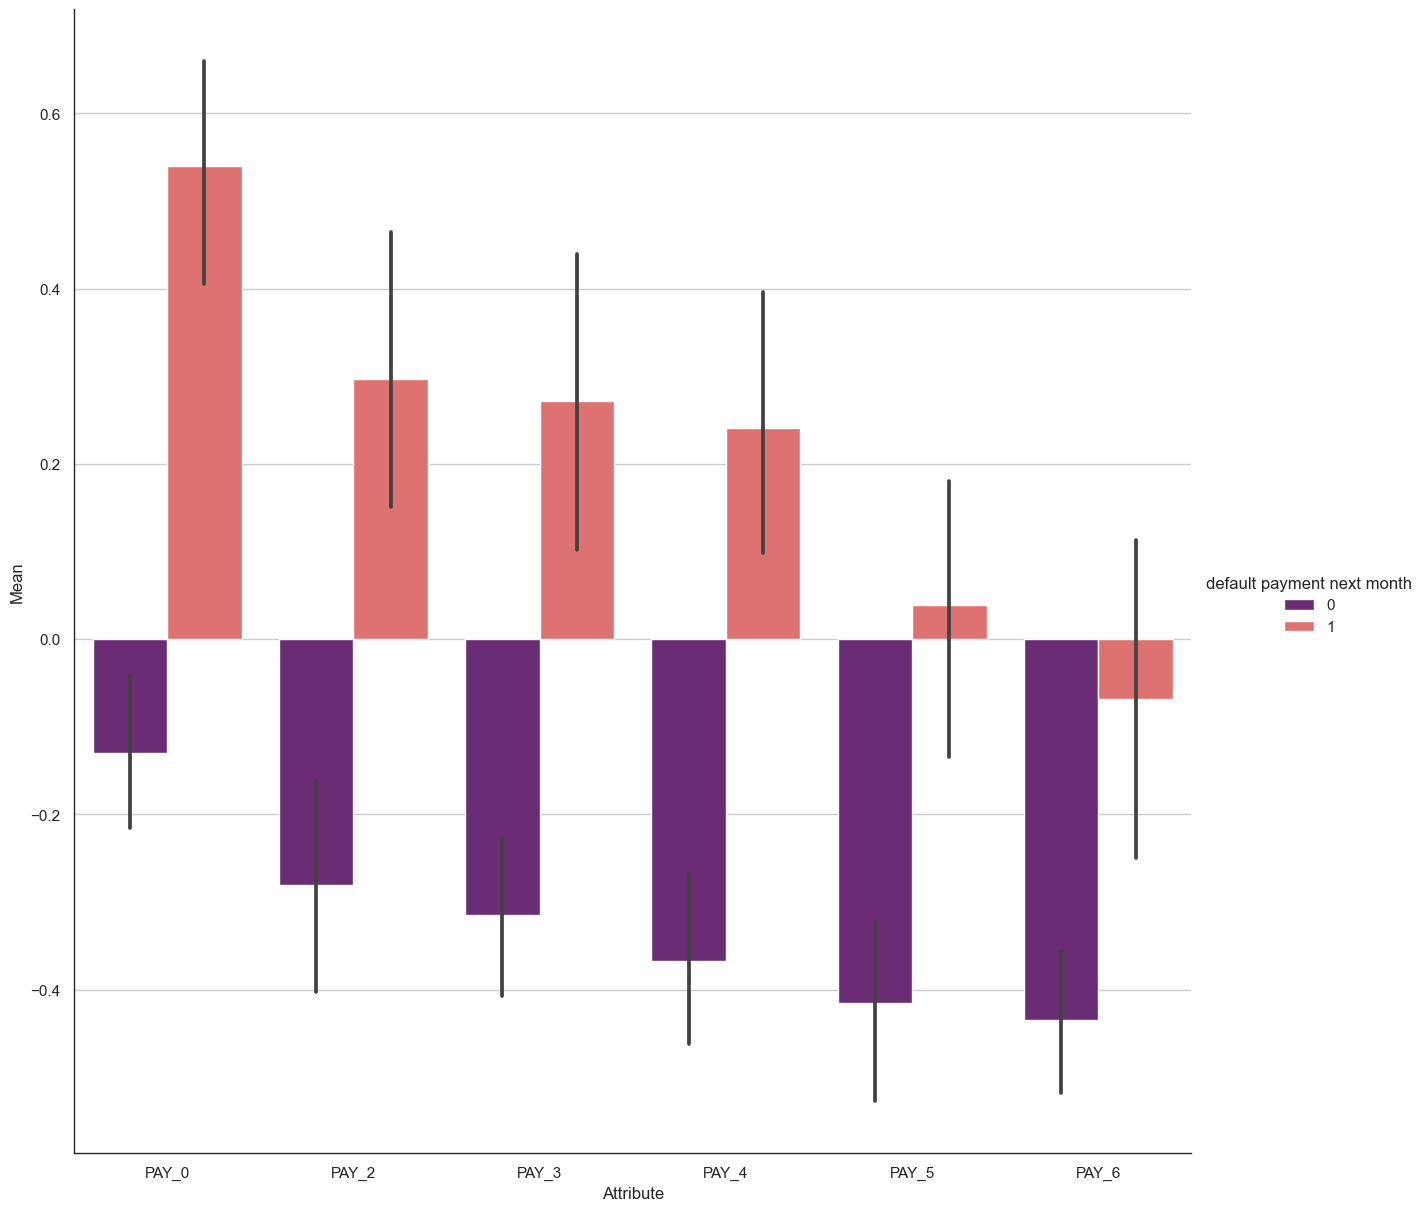

In [376]:
# Group-By for the data by the Catagorical Variables - Noticed there were groups that were not defined by the data set  

attr_group_means = bank_db_df.groupby(['SEX','EDUCATION','MARRIAGE','default payment next month']).mean()
attr_group_means = attr_group_means.reset_index()

PAY_group_means = pd.melt(attr_group_means, id_vars=['default payment next month'], value_vars=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',], ignore_index=True, var_name='Attribute', value_name='Mean')

g = sns.catplot(x='Attribute', y='Mean', hue='default payment next month', data=PAY_group_means, kind='bar', height=12,palette='magma')


<span style='background:yellow'> 
The graph above requires knowledge of the dataset to read it correctly. For attributes PAY 0- 6, a negative value of -1 indicates that the borrower prepaid a month in advance for their credit card payment. If a borrower has a value of 2, the borrower deferred their payment by two months.  So, if we look at the average broken down by default status, we see that per payment cycle default borrowers have a positive average. This positive average indicates that the borrower deferred their payments. Therefore, these attributes will aid in classifying a default or not.  Logically if a borrower prepays, they are not defaulting. But if a borrower defers a payment then the risk of defaulting increases significantly.
</span>

# Explore Joint Attributes

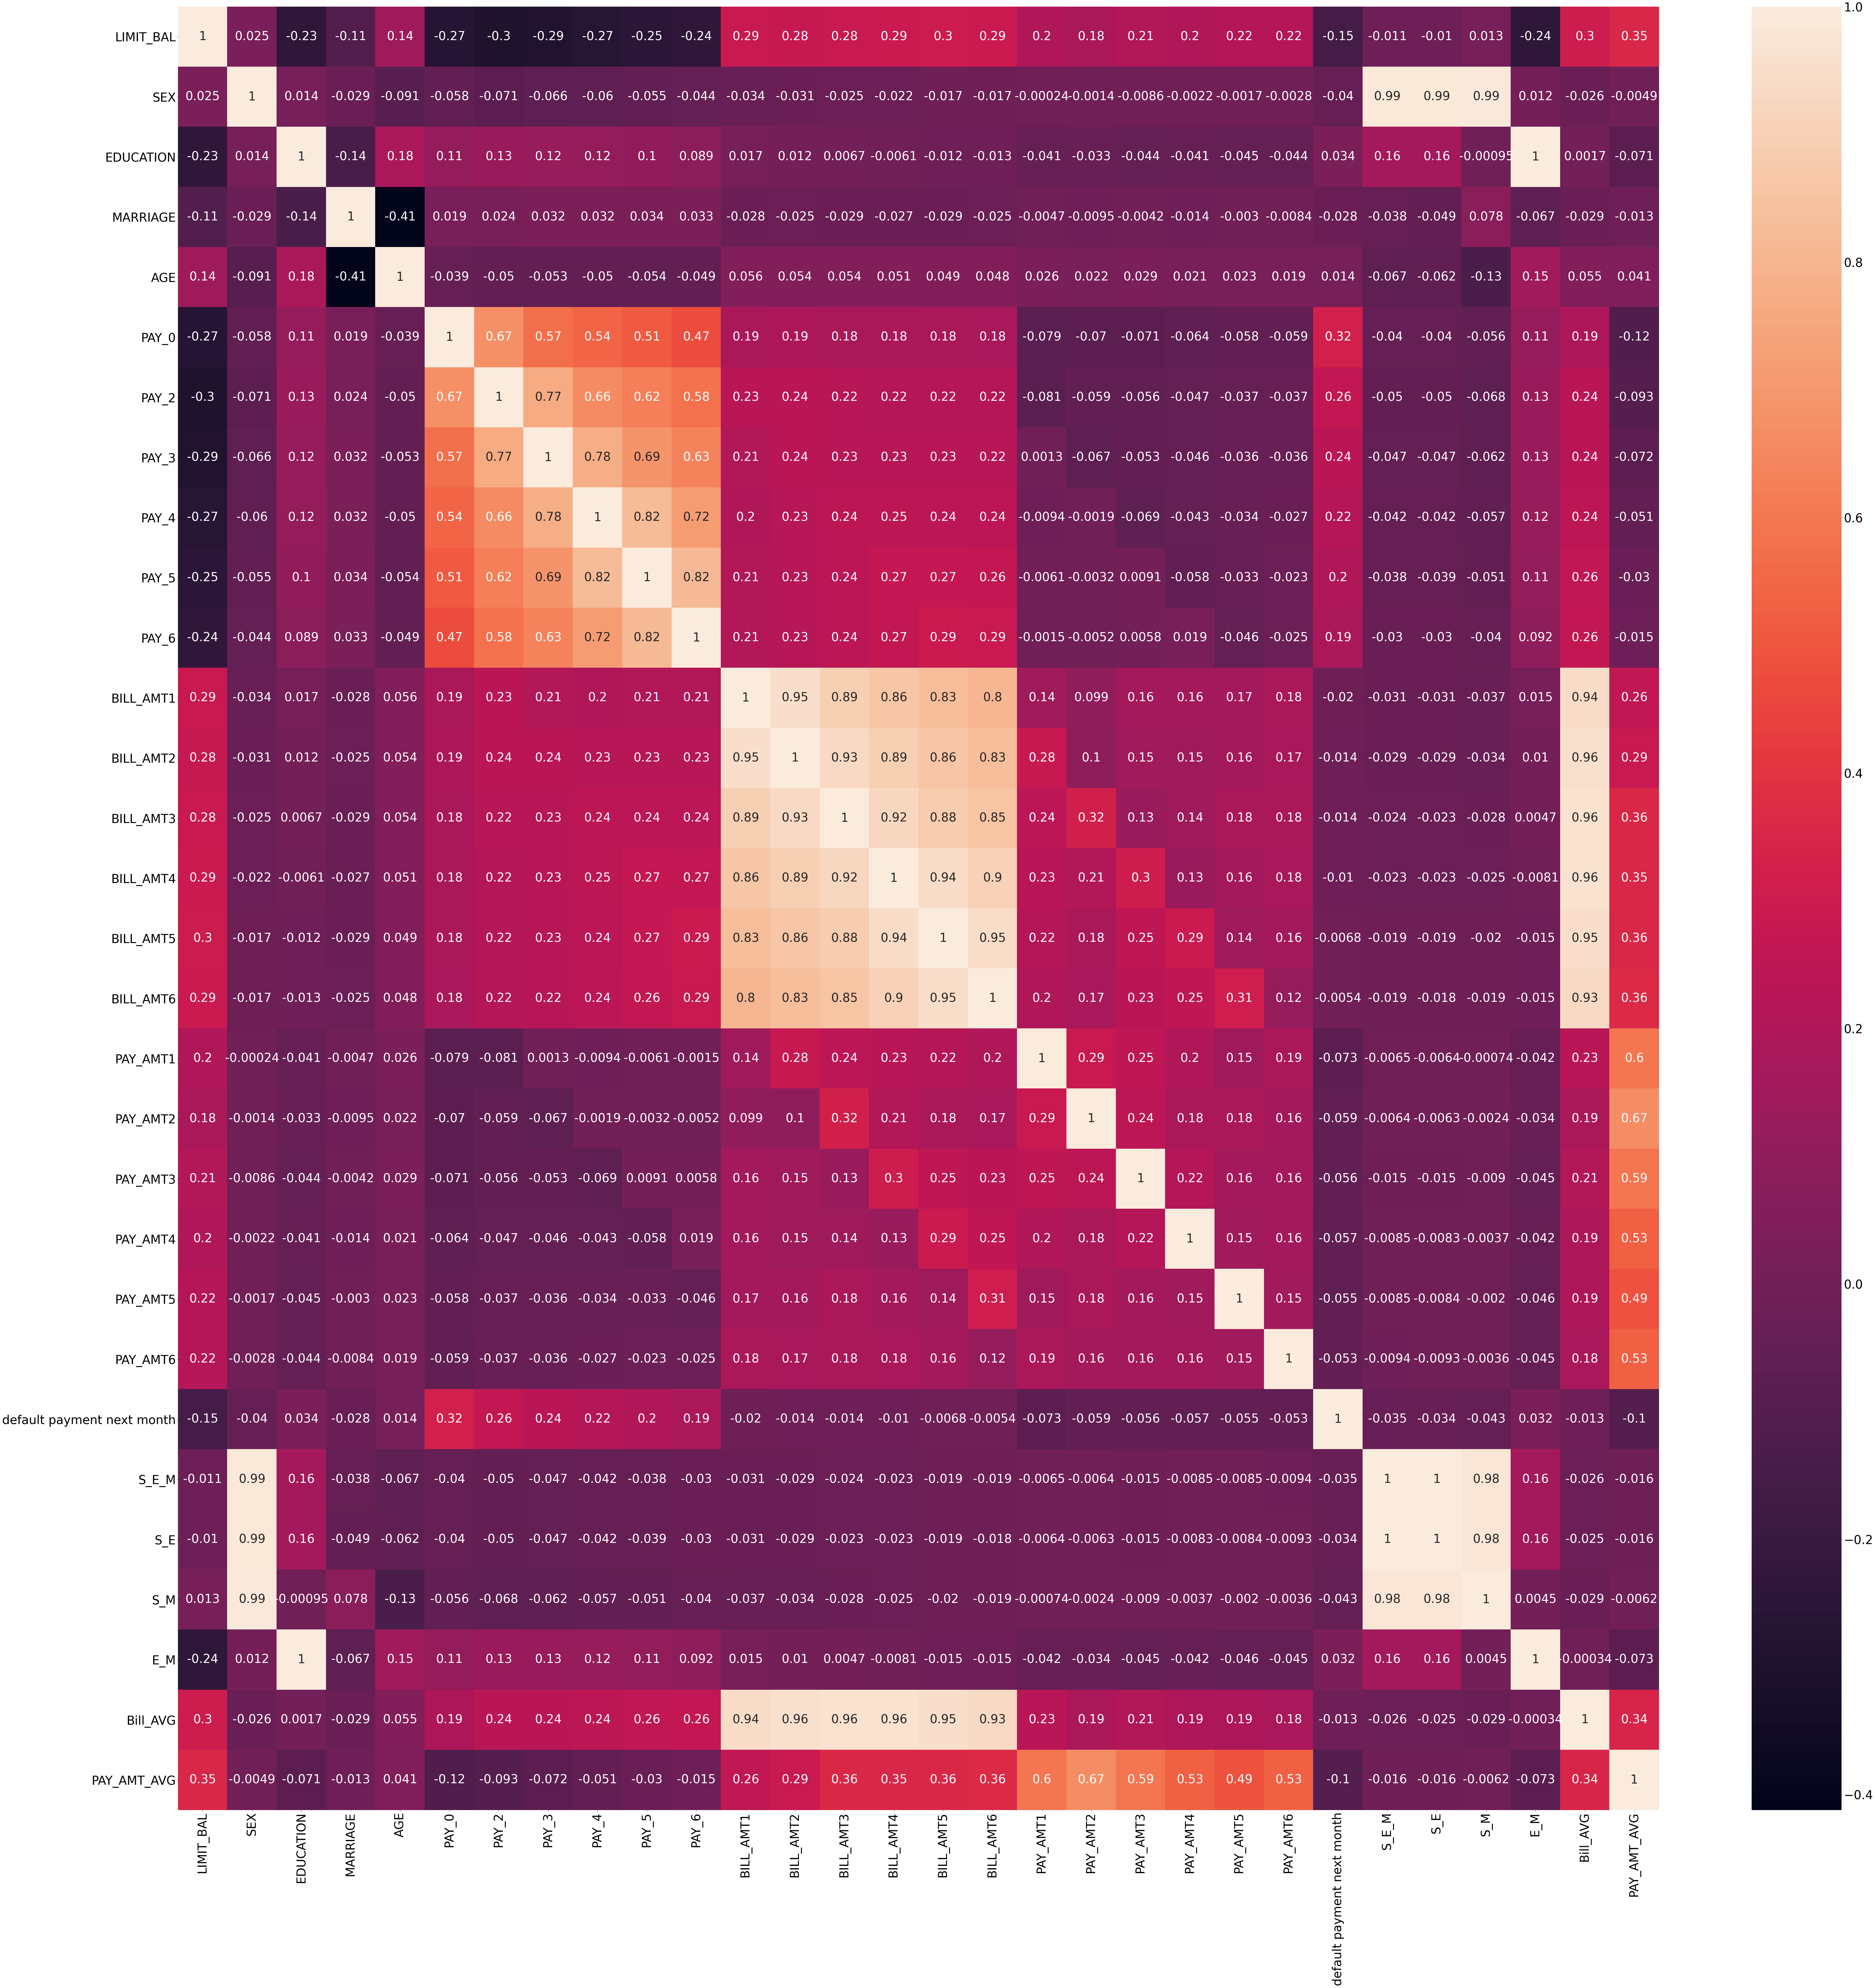

In [53]:
corrMatrix = bank_db_df_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams["figure.figsize"] = (110,110)
plt.savefig('CorrMatrix.png')

<span style='background:yellow'> 
Utilizing a correlation plot we first identified attributes that showed strong relationships to those that defaulted. This was the highest for history of past payments which recorded data on payment delays before defaulting. Payment delay data specifically at the earlier time frames showed the highest correlation to default data. A graph of the correlation matix is seen above. When reviewing the graph we identified that only Pay 0 through Pay 6 had a high correlation to the variable of interest of default payment next month.  This finding is consistent with our analysis of prepayments. If a borrower prepays which will be reflected in variables PAY 0 to PAY 6, then the borrower isn’t defaulting and a deferred amount increases the likelihood that the borrower defaults.
</span>

<AxesSubplot:xlabel='AGE', ylabel='EDUCATION'>

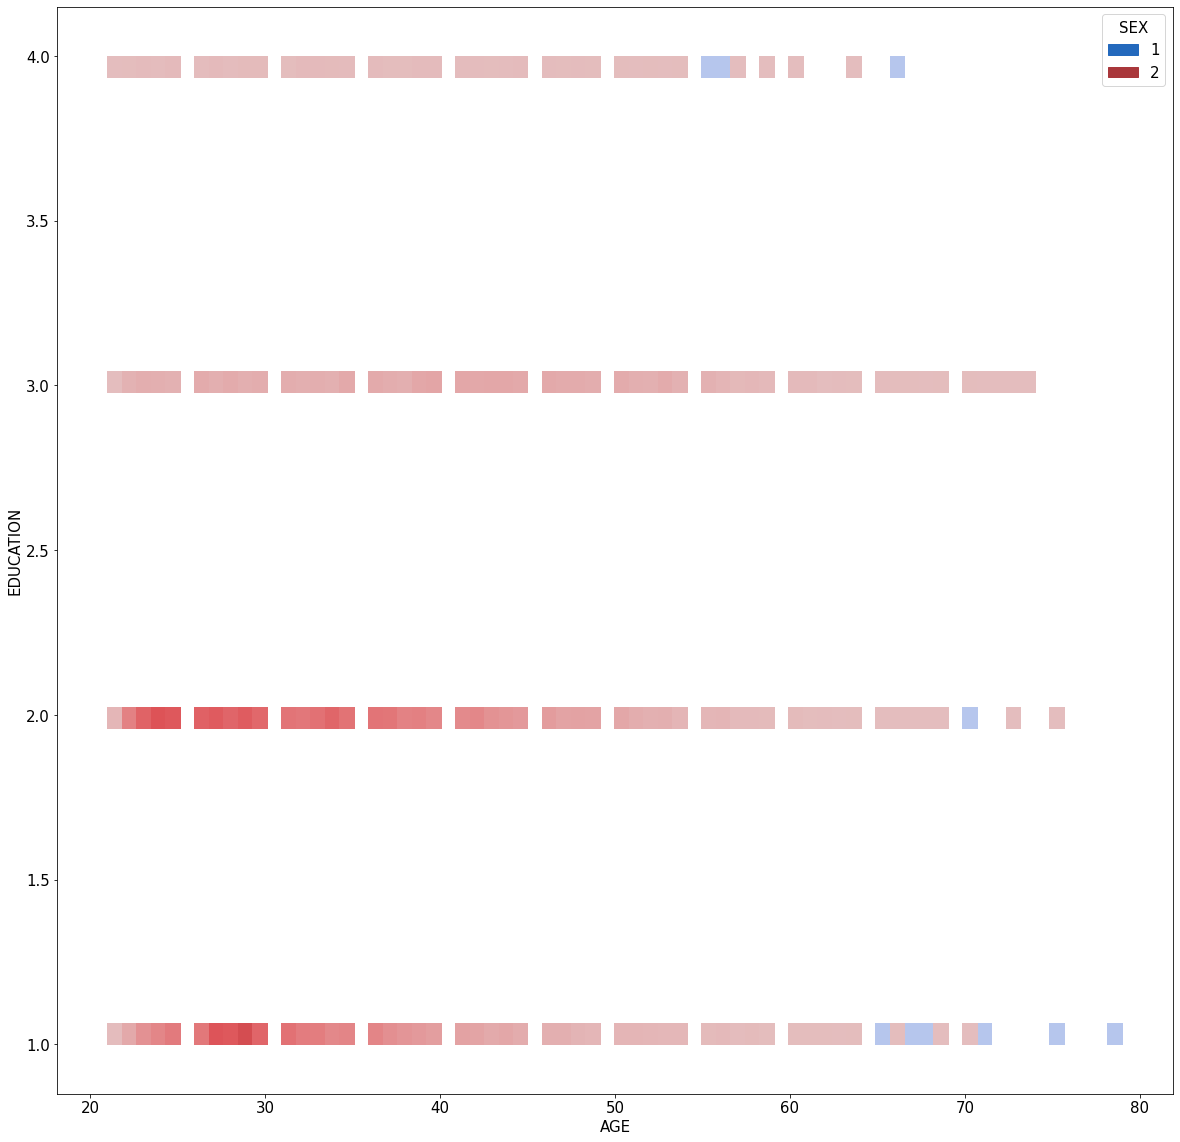

In [297]:
df_sub_comp1 = bank_db_df[["AGE","SEX","EDUCATION"]]
#sns.scatterplot(data=df_sub_comp1, x="AGE", y="EDUCATION", hue="SEX", palette='vlag')
sns.histplot(data=df_sub_comp1, x="AGE", y="EDUCATION", hue="SEX", palette='vlag')

<span style='background:yellow'> 
A visual analysis of Education versus Age with differences in Sex was completed as shown above. We find that at the higher levels of education males were more present than females. Additionally they were also somewhat older in age range compared to lower levels of education where the amount of females were more even with the age maximums also dropping significantly. 
</span>

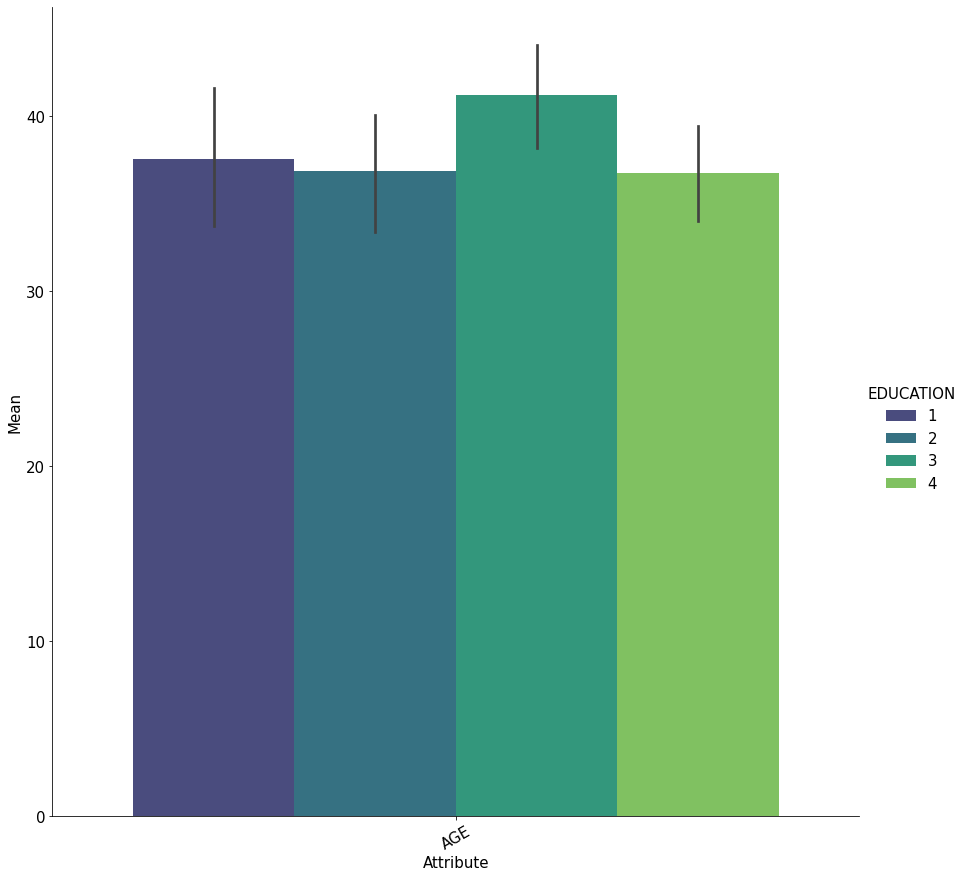

In [264]:
# Group-By for the data by the Catagorical Variables - Noticed there were groups that were not defined by the data set  
attr_group_means = bank_db_df.groupby(['SEX','EDUCATION','MARRIAGE']).mean()
attr_group_means = attr_group_means.reset_index()

AGE_group_means = pd.melt(attr_group_means, id_vars=['EDUCATION'], value_vars=['AGE',], ignore_index=True, var_name='Attribute', value_name='Mean')

g = sns.catplot(x='Attribute', y='Mean', hue='EDUCATION', data=AGE_group_means, kind='bar', height=12,palette='viridis')
g.set_xticklabels(rotation=30)

<span style='background:yellow'> 
We see that average age per education level is nearly the same. Regardless of education level, the age profile of the borrower is around 38 to 40. This is consistent with the fact that majority of borrowers within the dataset are middle age. Therefore we can’t build a profile of borrowers with education and age since the averages are nearly the same.
 
</span>

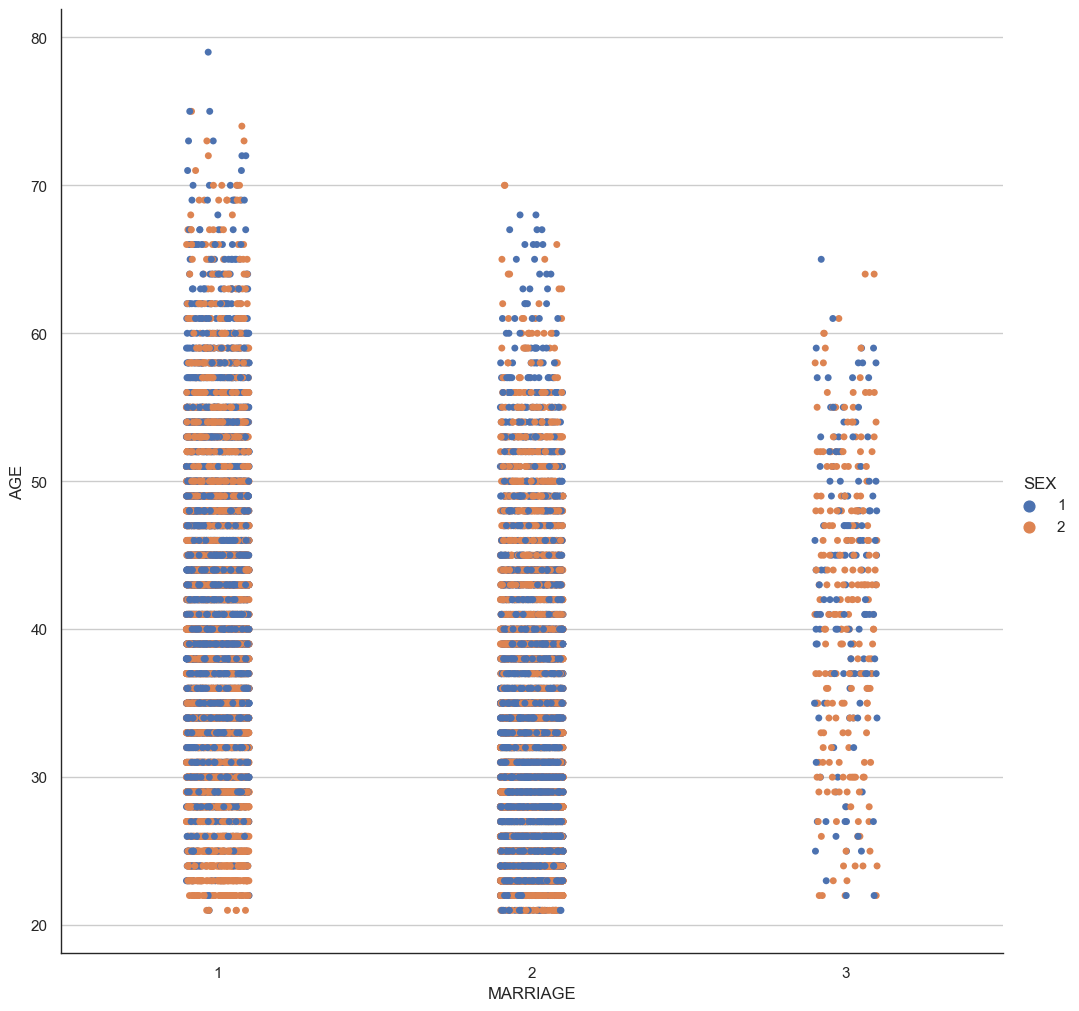

In [378]:
df_sub_comp4 = bank_db_df[["MARRIAGE","AGE","SEX"]]
#sns.scatterplot(data=df_sub_comp4, x="MARRIAGE", y="AGE", hue="SEX",palette='deep')

sns.catplot(data=df_sub_comp4, x="MARRIAGE", y="AGE", hue="SEX",palette='deep',height = 10)


<span style='background:yellow'> 
In an analysis of age and marriage we found that single clients were typically more often male and higher in age. Records of  clients that were married also displayed a lean toward male gender, while those in the "other" category were interestingly more often female and younger than in other categories.
</span>

<AxesSubplot:xlabel='PAY_0', ylabel='LIMIT_BAL'>

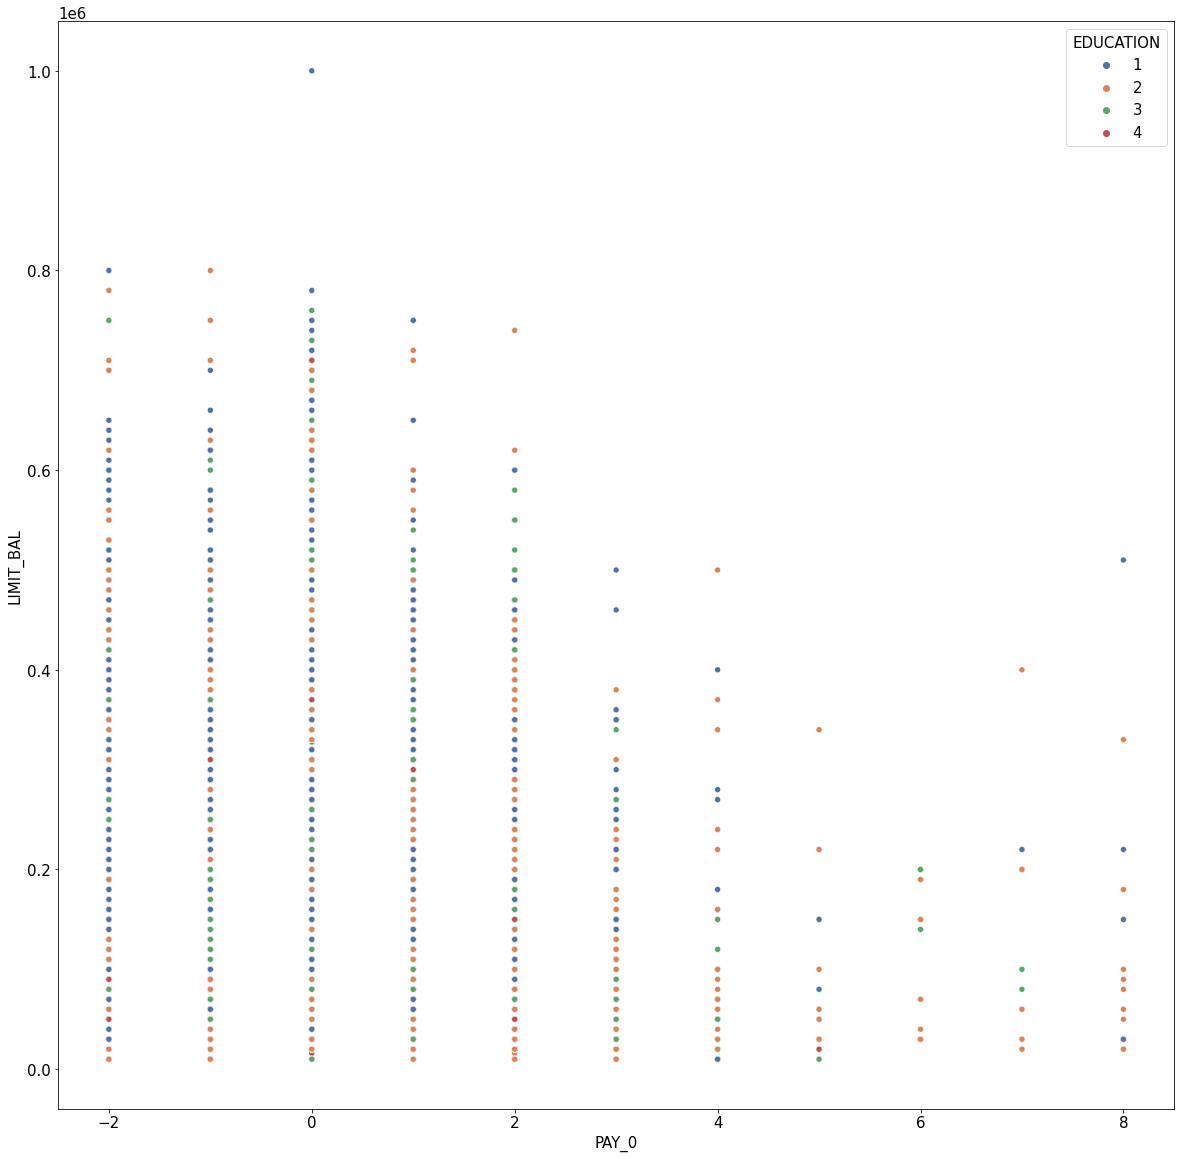

In [92]:
df_sub_comp2 = bank_db_df[["LIMIT_BAL","PAY_0","EDUCATION"]]
sns.scatterplot(data=df_sub_comp2, x="PAY_0", y="LIMIT_BAL", hue="EDUCATION", palette='deep')

<span style='background:yellow'> 
Education levels was analyzed against Limit Balance versus Past Payments made by clients which interestingly shows a negative correlation between balance limit and past due payments. It was found that clients with longer periods of payment delays would generally have smaller limit balances likely because they had less or poor credit history to build a higher limit balance with. In addtion it was found that clients with higher levels of education were more likely to have larger limits on their cards and more likely to pay their bill on time, perhaps due to differences in income level.</span>

<AxesSubplot:xlabel='BILL_AMT2', ylabel='LIMIT_BAL'>

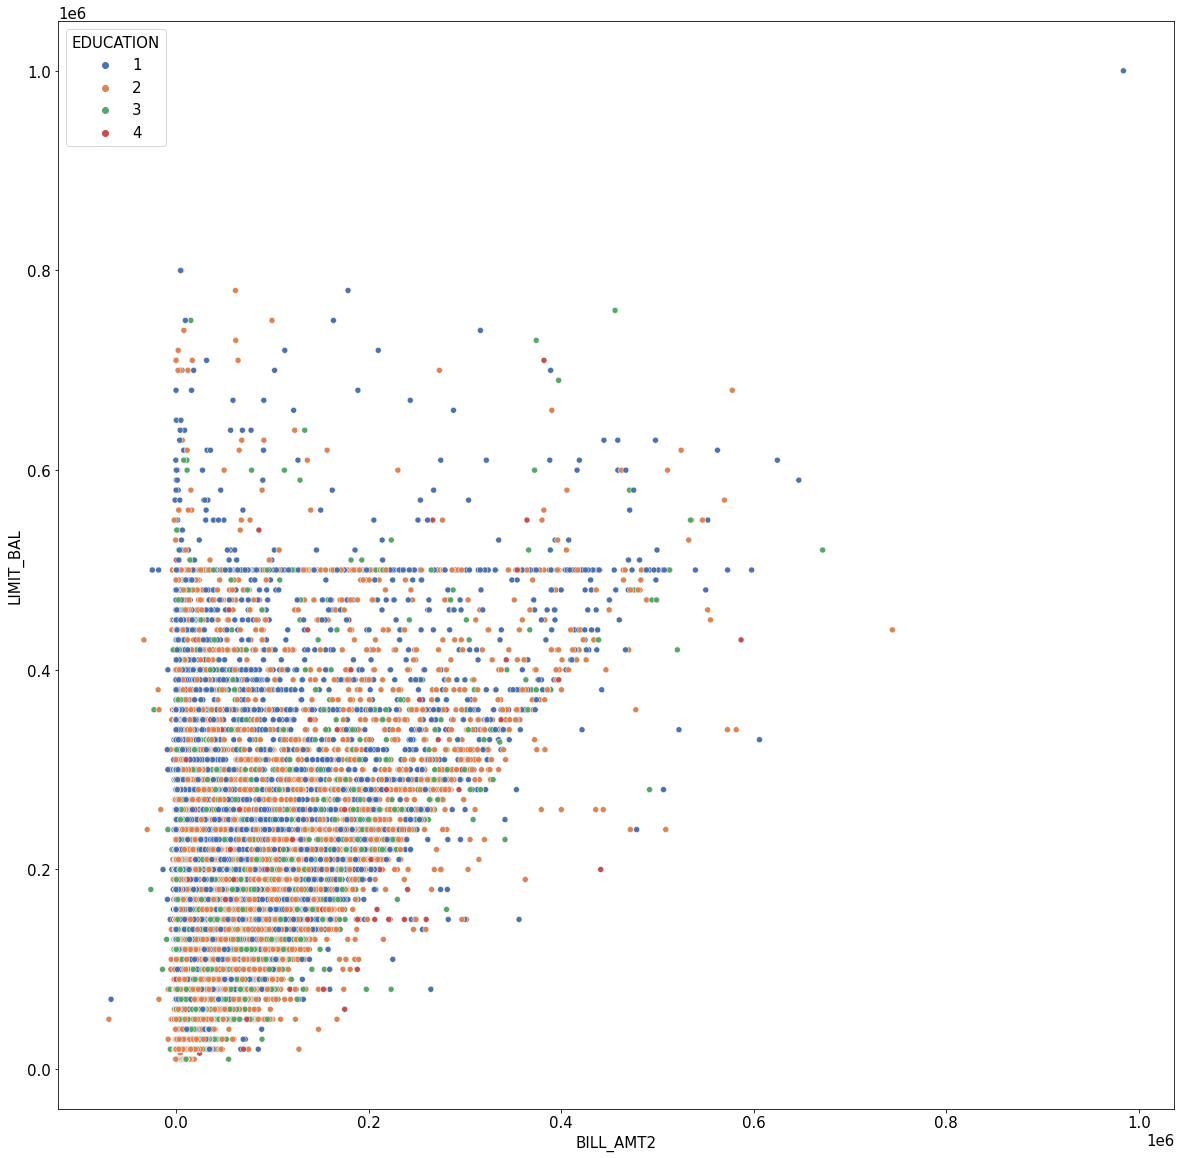

In [93]:
df_sub_comp3 = bank_db_df[["LIMIT_BAL","BILL_AMT2","EDUCATION"]]
sns.scatterplot(data=df_sub_comp3, x="BILL_AMT2", y="LIMIT_BAL", hue="EDUCATION",palette='deep')

<span style='background:yellow'> 
Education levels was lastly compared between Limit Balance versus the second Bill Amount on record, due to the higher correlation between the two. This had an interesting split in the records where some increased linearly in bill amount for a portion of the records as their limit balance also increased and others stayed at low or zero bill amounts. This seems to indicate that some clients would typically use more of their credit given a higher limit while several others would remain at a very small or zero bill amount. Education level in some areas displayed trends or groupings of similar levels though not in any obviously meaningful way. There was however several threshold values of limit balance where records were condensed into horizontal lines that stand out from the rest of the data. This would seem to indicate certain values offered by the credit card companies with a particularly dense area at 500,000 dollars where it would seem clients would typically spend more as well.
</span>

# Explore Attributes and Class

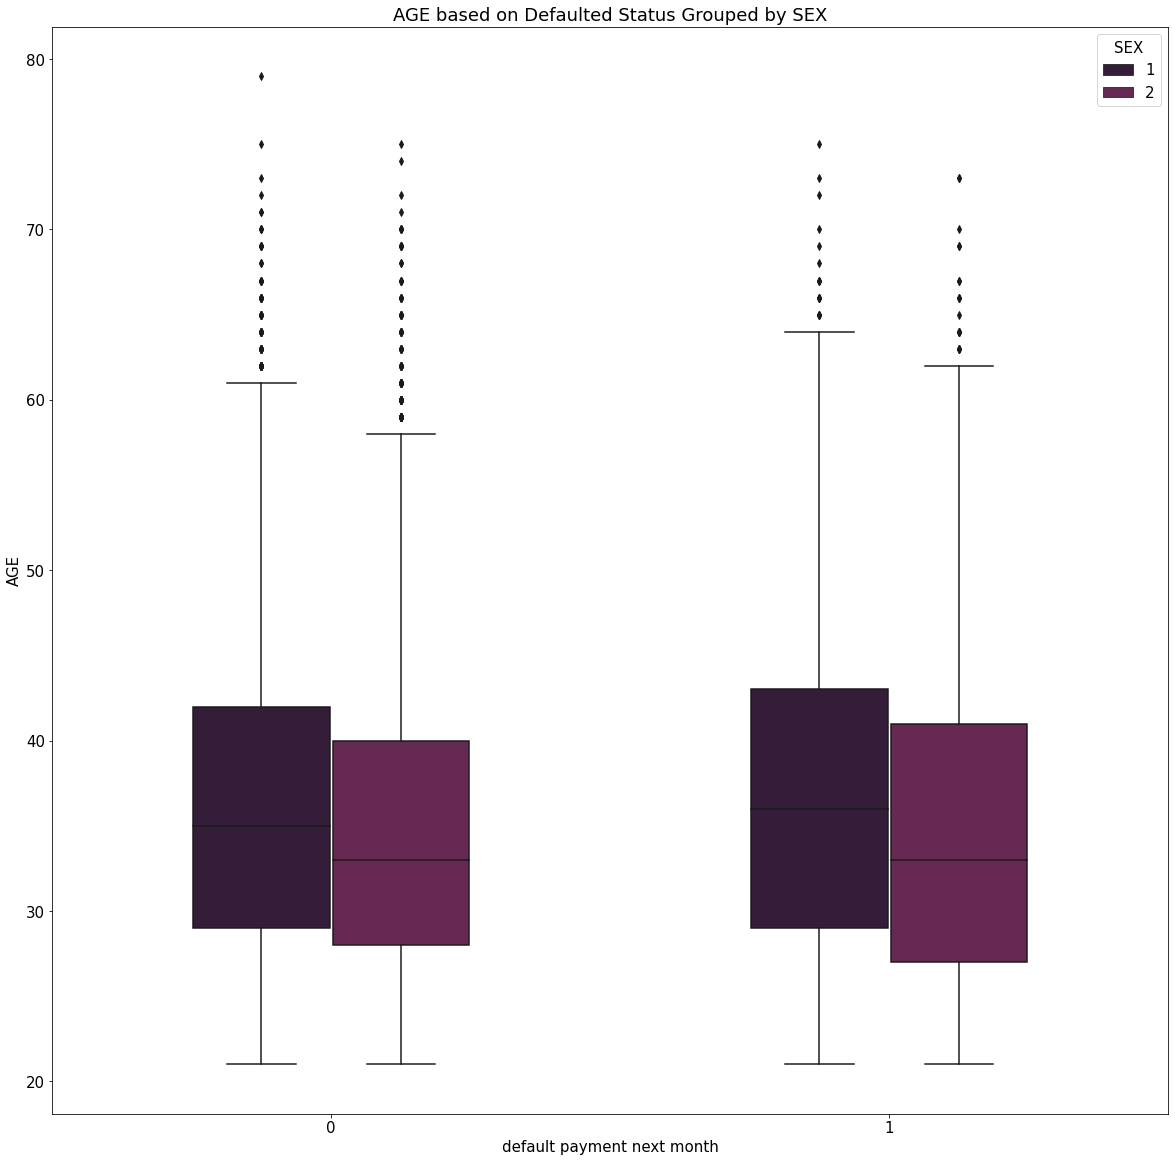

In [115]:
#Create a boxplot for the summary statistics for the categorical variables based on AGE
age_bplt = sns.boxplot(x="default payment next month",y="AGE",hue="SEX",data=bank_db_df,
                      width=.5,).set_title("AGE based on Defaulted Status Grouped by SEX")

<span style='background:yellow'> 
There does not appear to be any difference between the age of defaults and non-defaults with both having a median “AGE” of 34. The variance (standard deviation) between in age between defaults and non-defaults were very close at 10 and 9.08 respectively; with both groups having a slight skewness towards older customers.
</span>

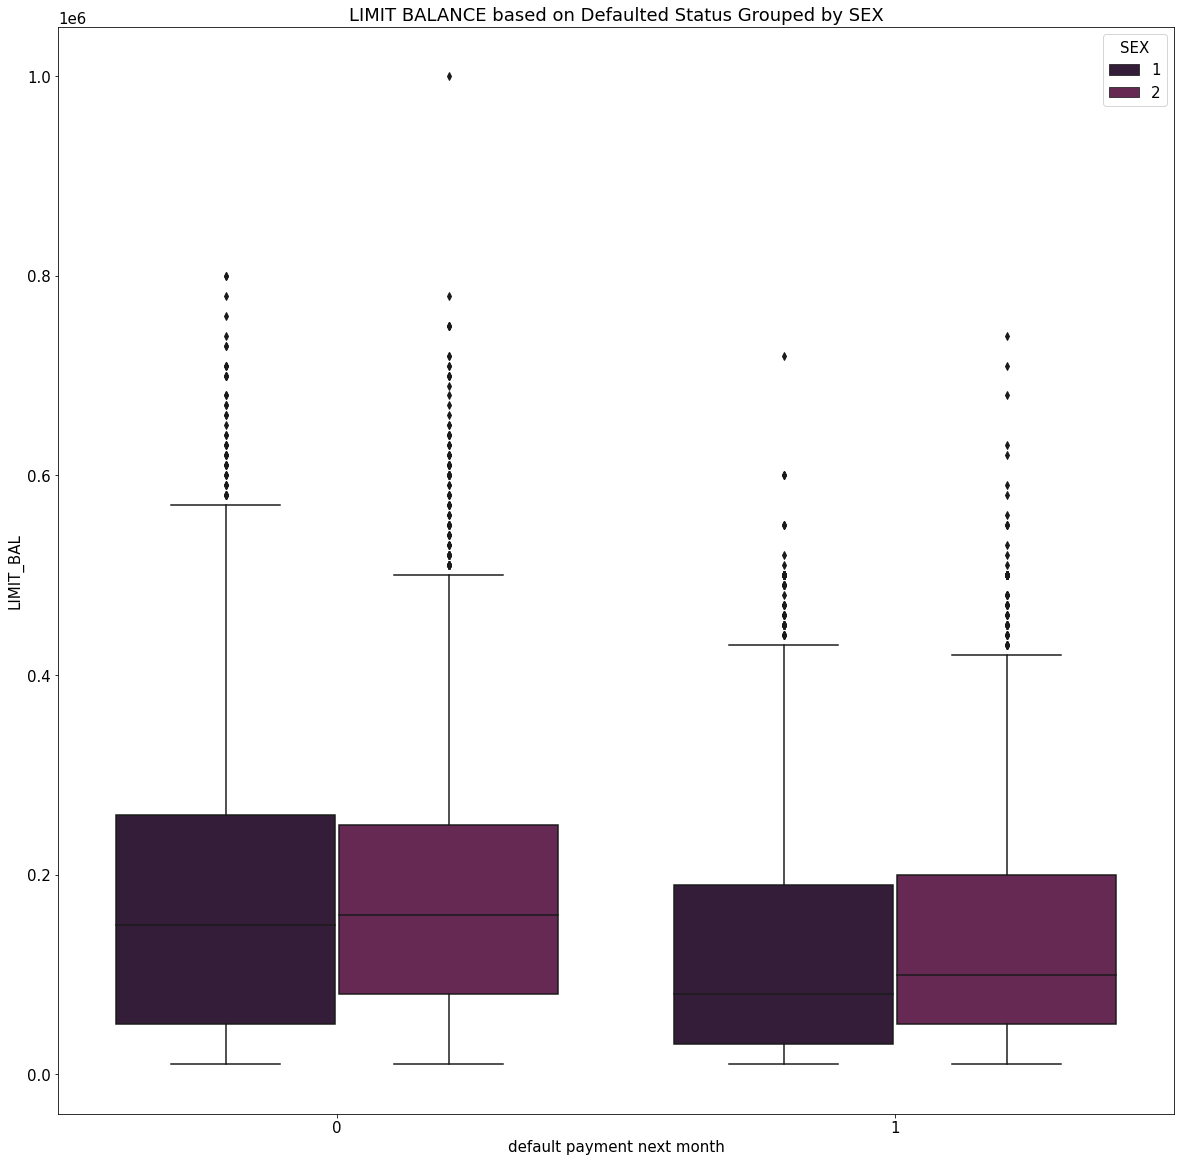

In [120]:
#Create a boxplot for the summary statistics for the categorical variables based on Limit Balance
LIMBAL_bplt = sns.boxplot(x="default payment next month",y="LIMIT_BAL",hue="SEX",data=bank_db_df,
                      width=.80).set_title("LIMIT BALANCE based on Defaulted Status Grouped by SEX")
#plt.yticks(fig.get_yticks(), fig.get_yticks() * 0.1)

<span style='background:yellow'> 
The median limit balance of 140,000 dollars for the total dataset is higher than the 90,000 dollars median limit balance for the defaulted group versus 150,000 dollars for the non-defaulted group. Contrary to the average age between the two sex, the average limit balance for females is higher than males no matter the default status.
</span>

In [46]:
#Created Subsets based on Correlation Matrix 
df_sub_PAY = bank_db_df2[["default payment next month","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]] #splitting attributes based on high correlation
df_sub_BILL = bank_db_df2[["default payment next month","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]]

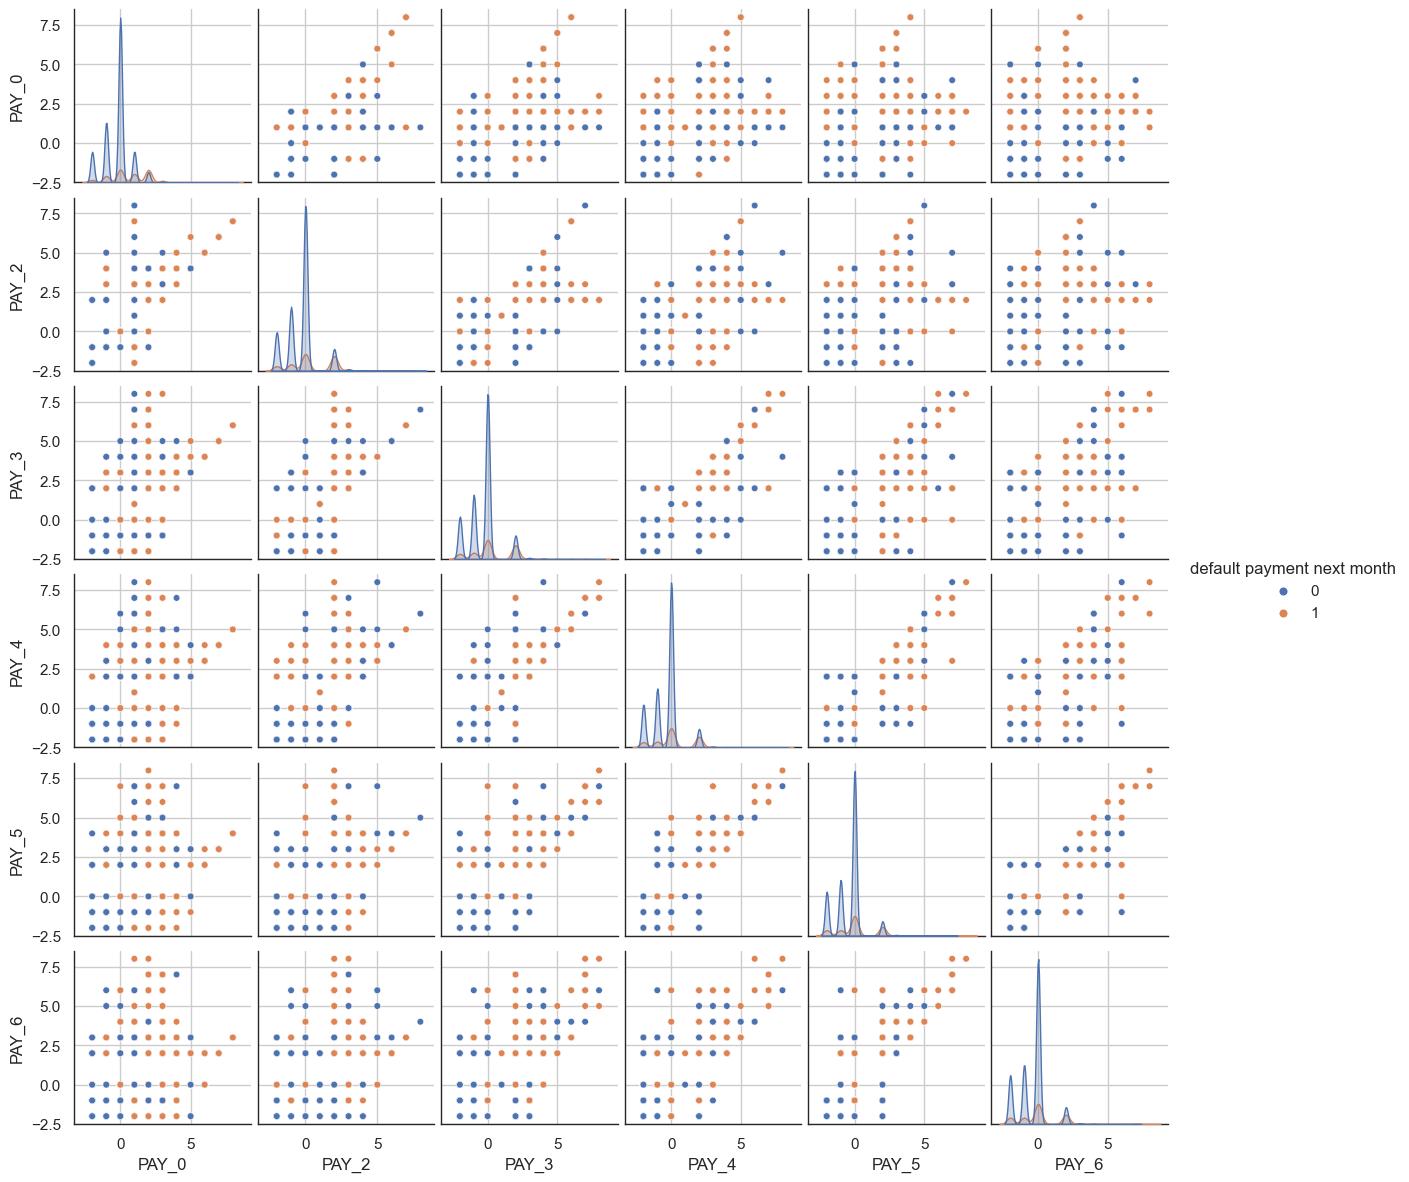

In [379]:
# Scatter Plots of the Pay Attributes
sns.pairplot(df_sub_PAY, hue="default payment next month", height=2)
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (20,20)

<span style='background:yellow'> 
The scatterplots above show correlations between PAY 0 – 6 variables with   each respective PAY attribute.  If a borrower prepays or defers in a previous month, the borrower is likely to repeat the payment history in the next month. This statement is visually apparent since non defaulters are experiencing a negative correlation. In PAY0 vs PAY2, we see that borrowers who prepaid have a negative correlation and thus did not default since they are prepaying. Borrowers who have a positive correlation between each month which indicates they deferred have a higher chance of defaulting.

</span>

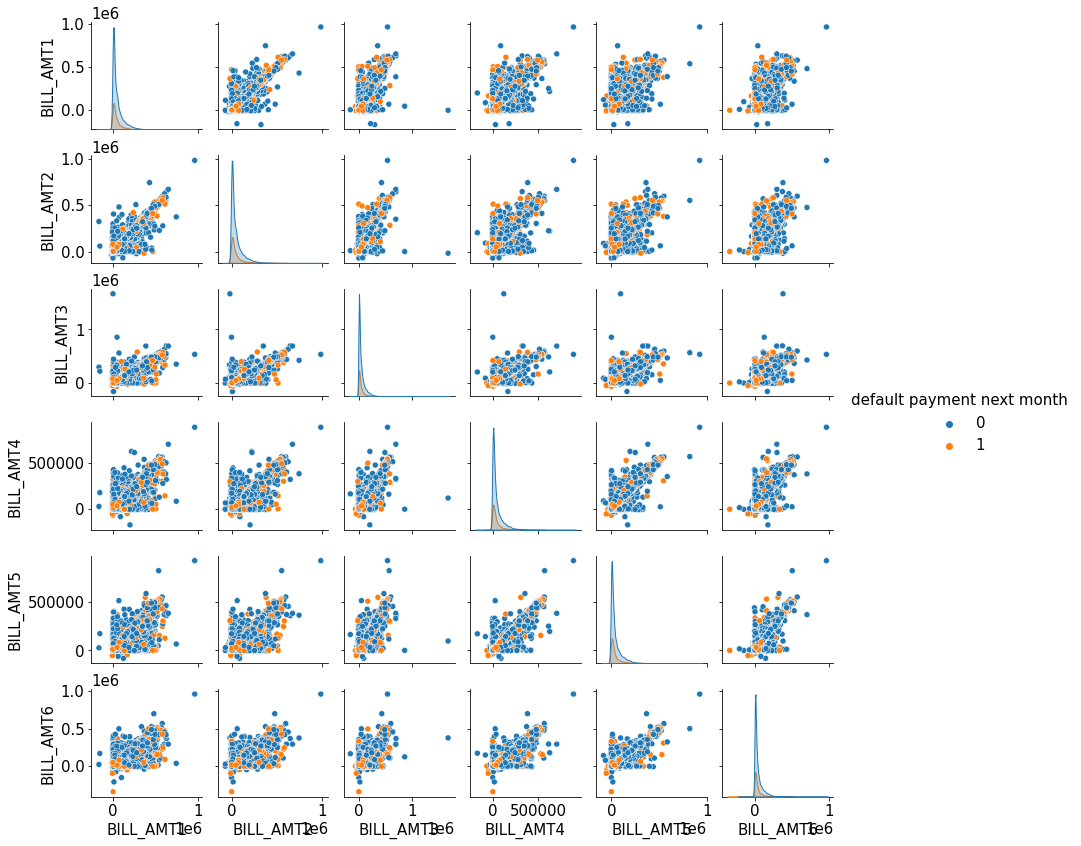

In [55]:
#Scatter Plots of the Bill Attributes 
sns.pairplot(df_sub_BILL, hue="default payment next month", height=2)

<span style='background:yellow'> 
Comparatively the grouping of those that defaulted is much clearer for the attributes that were at a higher default correlation (Pay Attributes) than those that were lesser correlated (Bill Amounts). Also of note was that grouping patterns fluctuated between comparisons of pay attributes indicating those that may work as better predictors.
</span>

<AxesSubplot:xlabel='PAY_6', ylabel='PAY_5'>

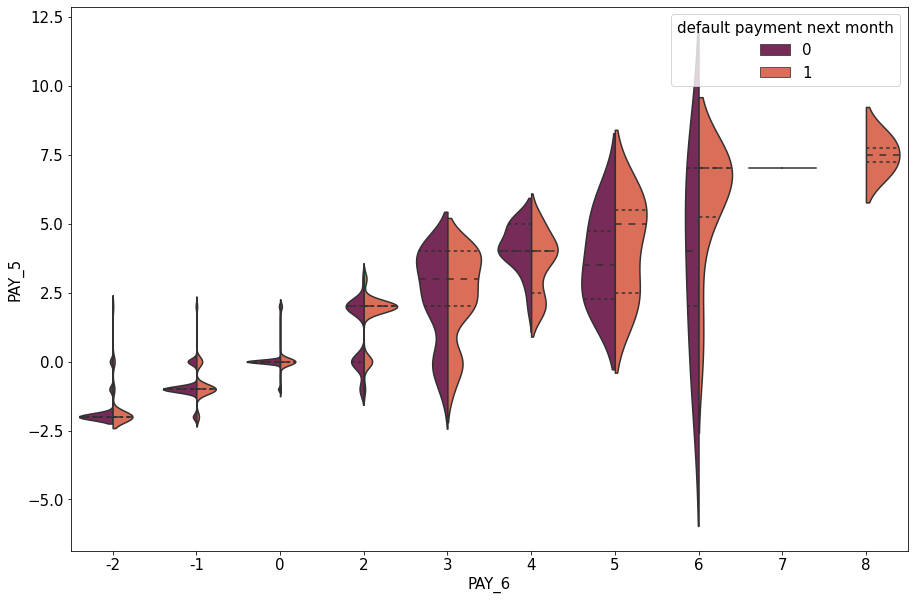

In [294]:
# Violin Plot of Pay 6 and Pay 5

f, ax = plt.subplots(figsize=(15, 10))

sns.violinplot(x="PAY_6", y="PAY_5", hue="default payment next month", data=bank_db_df2, 
               split=True, inner="quart",palette='rocket')

<span style='background:yellow'>
Examining the differences in payment history was best viewed in a violin plot comparison. The two plots both above and below clearly indicate an increased likelihood of default for increased payment delays. This makes sense logically as increased delays in payment will most likely lead to a client defaulting.
    </span>

<AxesSubplot:xlabel='PAY_0', ylabel='PAY_2'>

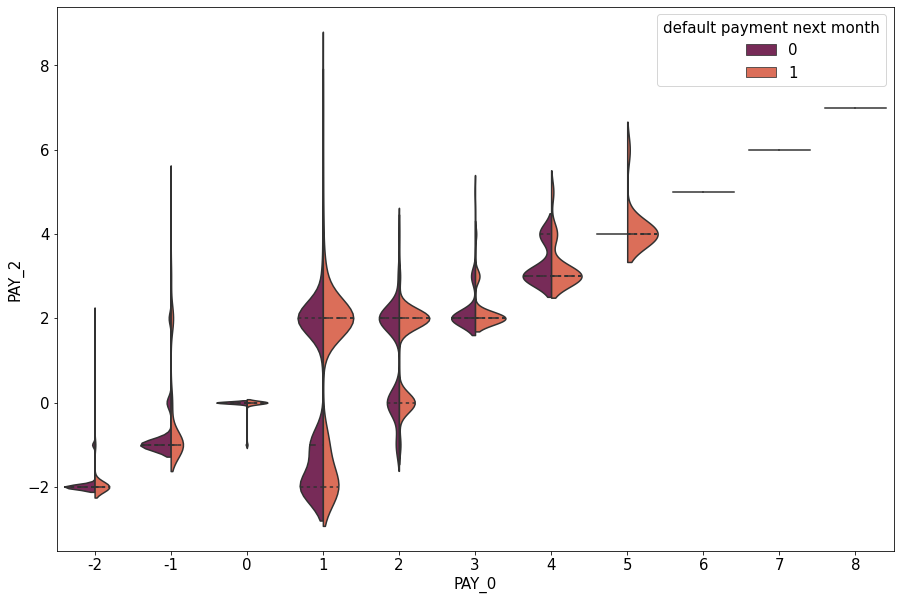

In [295]:
# Violin Plot of Pay 0 and Pay 2

f, ax = plt.subplots(figsize=(15, 10))

sns.violinplot(x="PAY_0", y="PAY_2", hue="default payment next month", data=bank_db_df2, 
               split=True, inner="quart",palette='rocket')

<span style='background:yellow'>
It is noted that the earlier the client begins to delay payments shows increased risk of default. The default risk especially increases as the delays are continued specifically past 3 months and beyond.
</span>

### PCA 

In [125]:
from sklearn.preprocessing import StandardScaler
features = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',
            'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
# Separating out the features
x = bank_db_df2.loc[:, features].values
# Separating out the target
y = bank_db_df2.loc[:,['default payment next month']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Utilized code from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2',
                         'principal_component_3','principal_component_4',
                         'principal_component_5','principal_component_6',
                         'principal_component_7','principal_component_8',
                         'principal_component_9'])
pca.explained_variance_ratio_



### Utilized code from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

array([0.36180187, 0.20618472, 0.08362378, 0.05085274, 0.04933822,
       0.04845462, 0.04349448, 0.04070514, 0.03800722])

In [127]:
finalDf = pd.concat([principalDf, bank_db_df2[['default payment next month']]], axis = 1)

In [128]:
finalDf.head()

principal_component_1  principal_component_2  principal_component_3  principal_component_4  principal_component_5  principal_component_6  principal_component_7  principal_component_8  principal_component_9  default payment next month
0              -1.774457              -0.613834              -0.633142              -0.474713              -0.033614              -0.077654              -0.051448               0.232366               3.055349                           1
1              -0.660334              -2.051521               0.426726               0.113607               0.148504              -0.100264               0.071387               0.134269              -0.852330                           1
2              -0.766104              -0.934008               0.023527              -0.003720              -0.099812              -0.113338               0.035160               0.062651              -0.217292                           0
3              -0.114276              -0.627801              -0.289996               0.133394              -0.044445               0.052357              -0.044003               0.025403              -0.192321                           0
4              -0.851808               0.029702               0.965619               0.731632               0.121898               0.497529              -0.258582               1.065251              -0.624595                           0

In [129]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   principal_component_1       30000 non-null  float64
 1   principal_component_2       30000 non-null  float64
 2   principal_component_3       30000 non-null  float64
 3   principal_component_4       30000 non-null  float64
 4   principal_component_5       30000 non-null  float64
 5   principal_component_6       30000 non-null  float64
 6   principal_component_7       30000 non-null  float64
 7   principal_component_8       30000 non-null  float64
 8   principal_component_9       30000 non-null  float64
 9   default payment next month  30000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


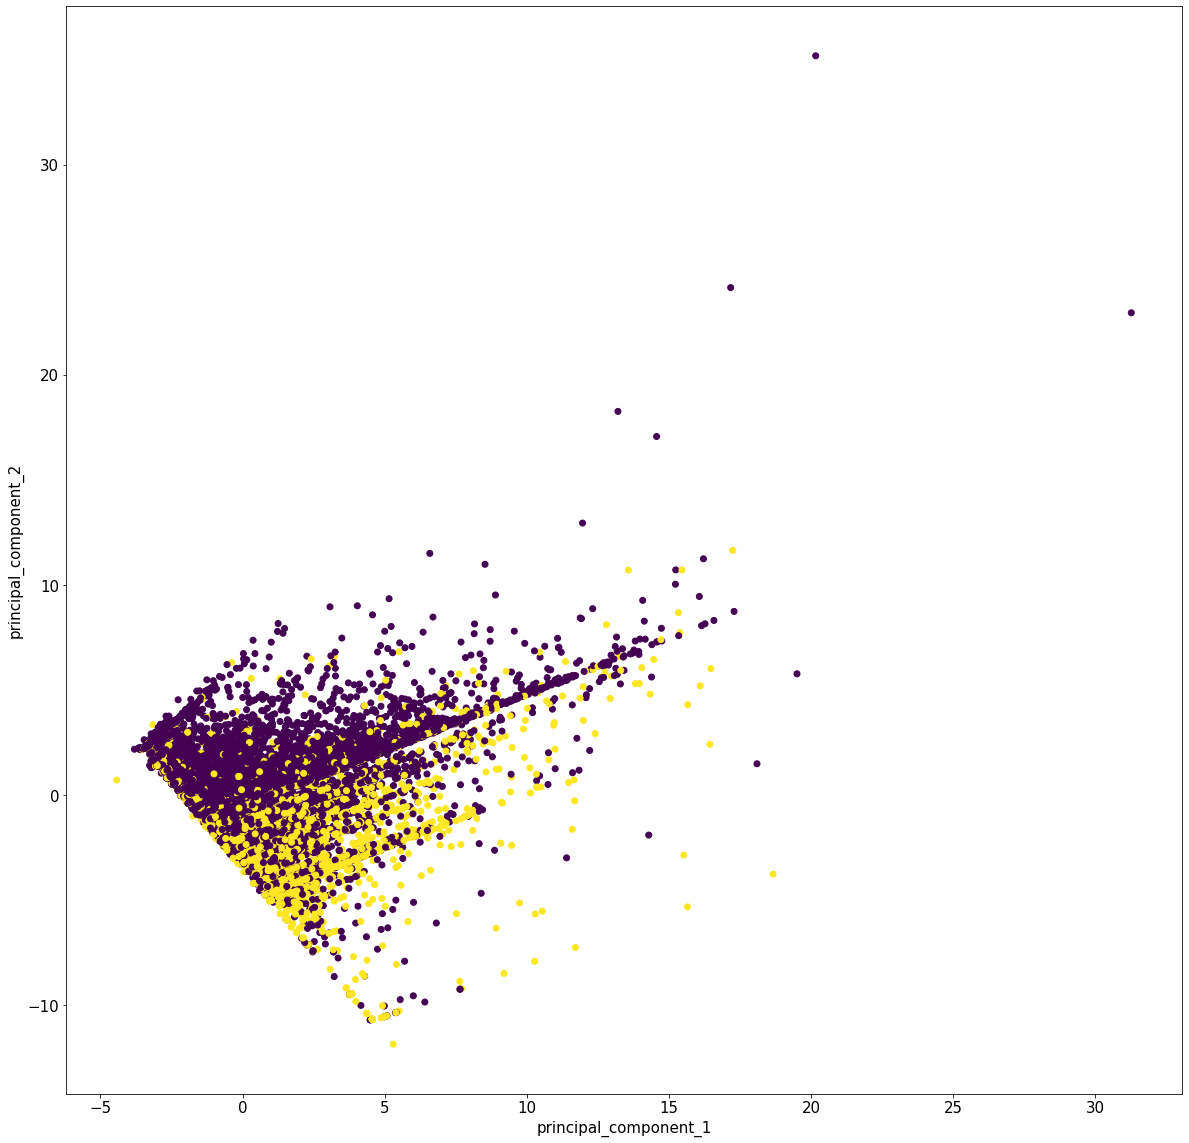

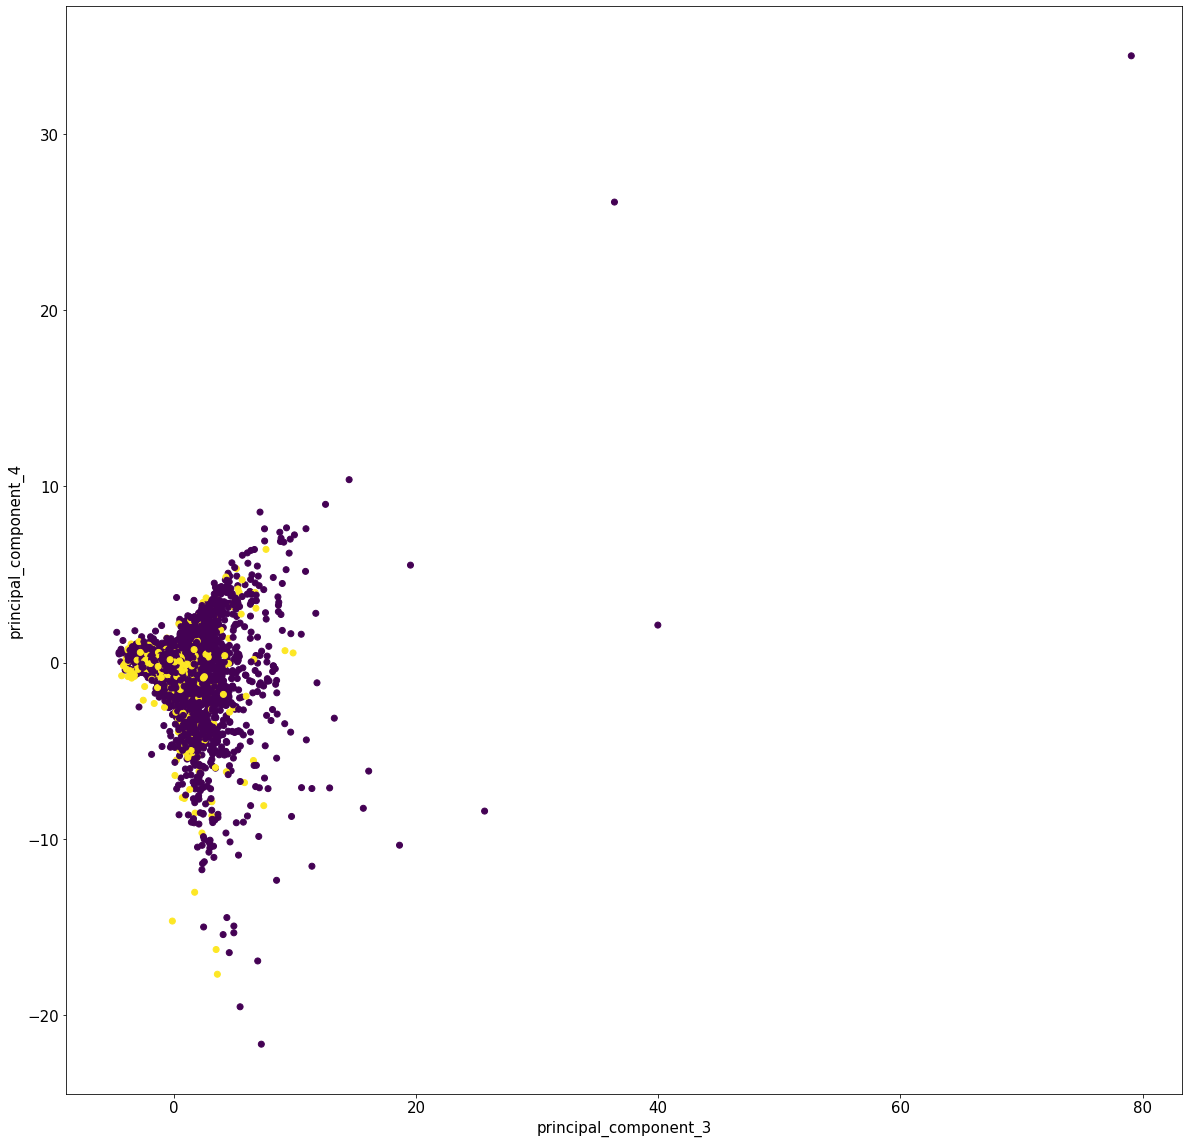

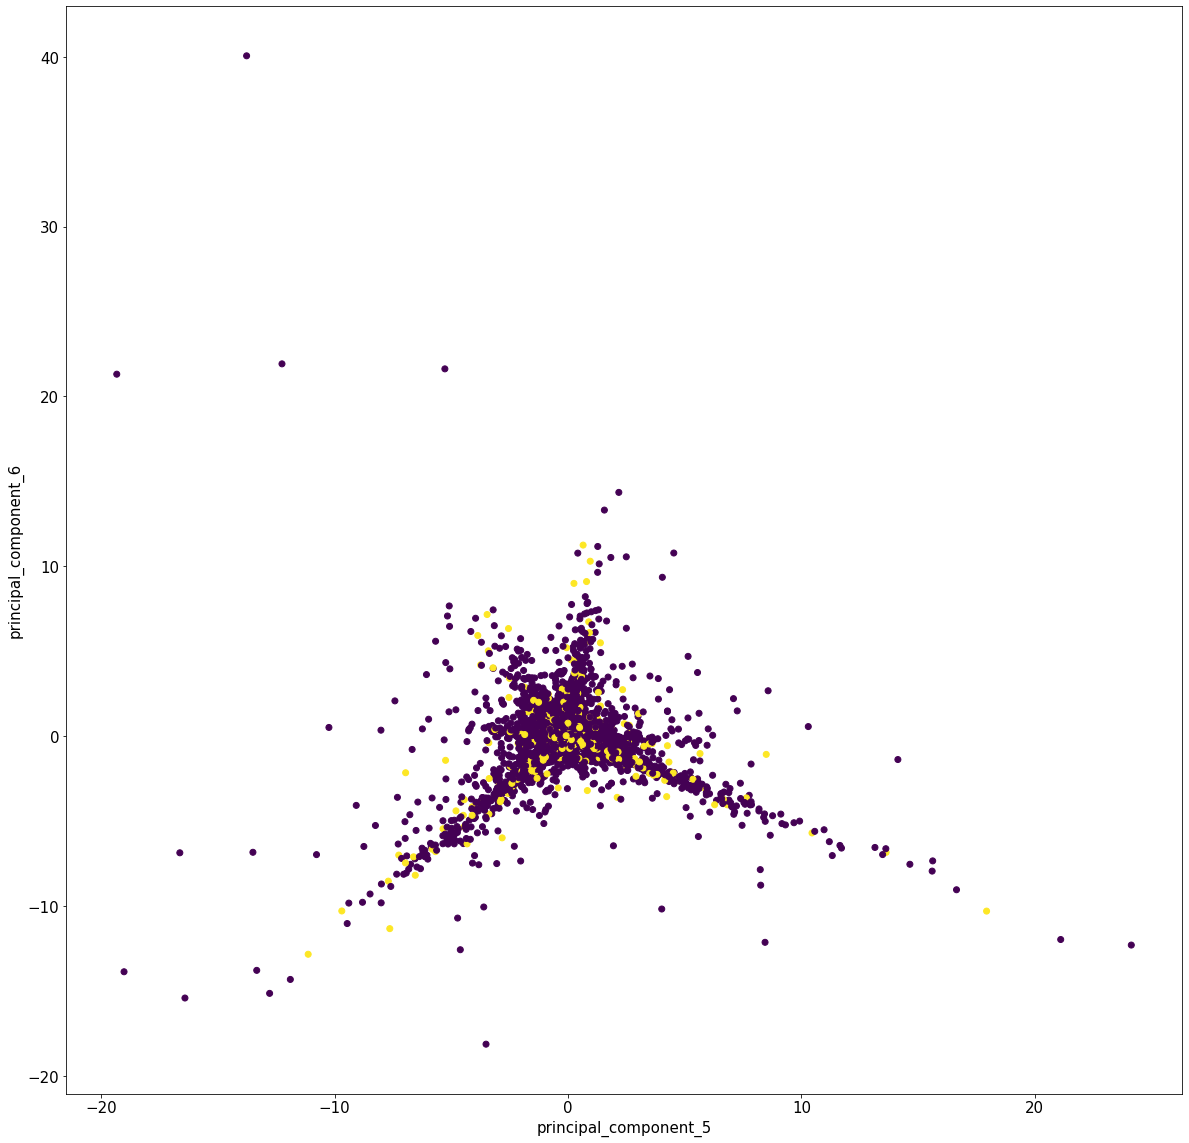

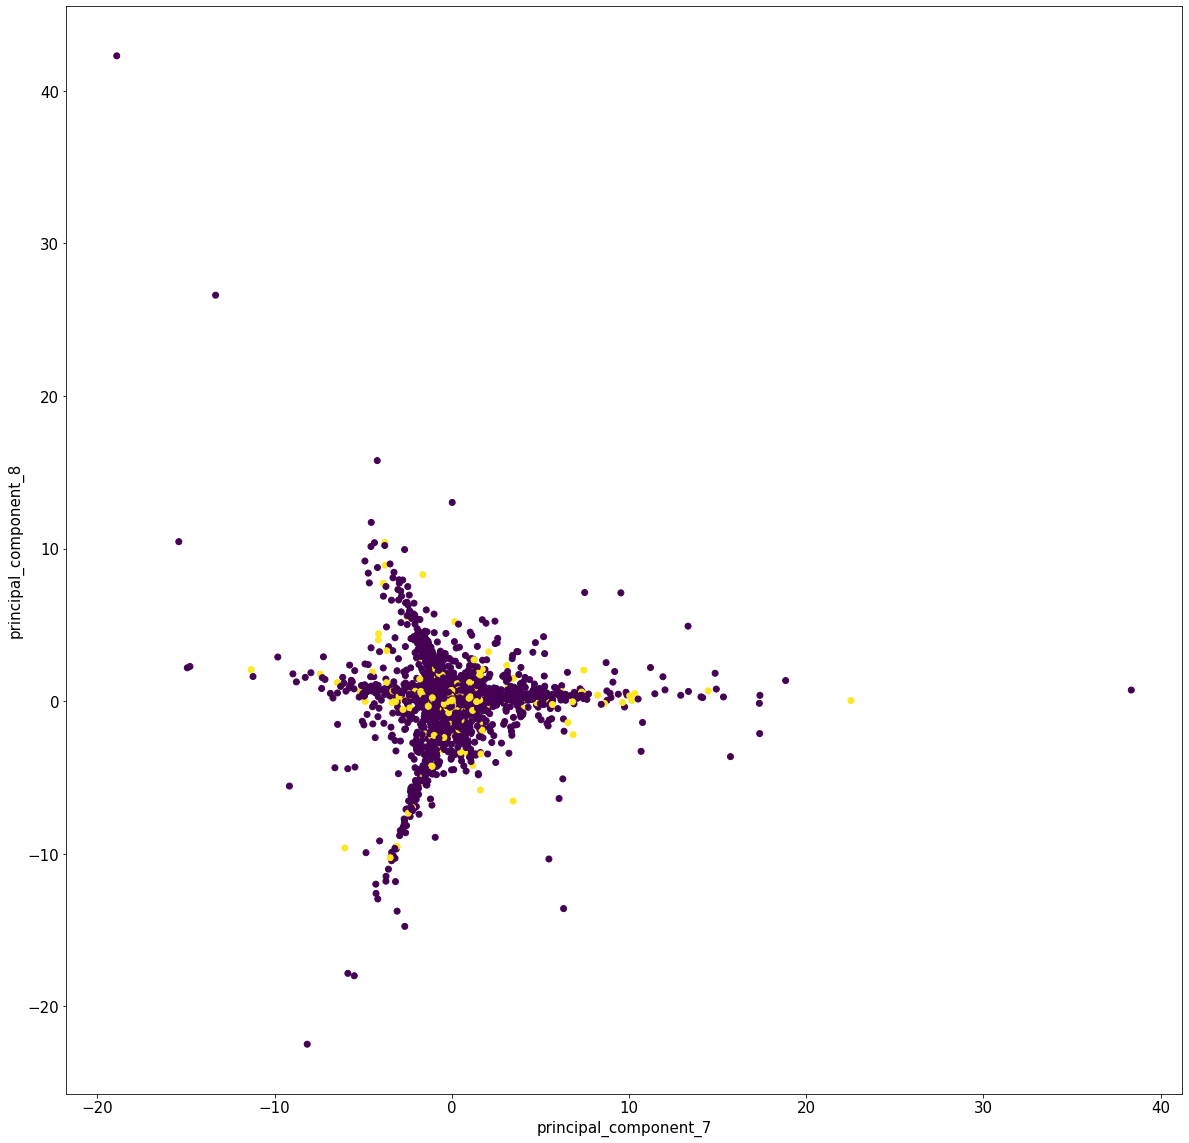

In [131]:
######Graph portion

import matplotlib.pyplot as plt

plot1 = plt.figure(1)
plt.scatter(finalDf['principal_component_1'],finalDf['principal_component_2'],c=finalDf['default payment next month'],label=finalDf['default payment next month'])
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2');

plot2 = plt.figure(2)
plt.scatter(finalDf['principal_component_3'],finalDf['principal_component_4'],c=finalDf['default payment next month'],label=finalDf['default payment next month'])
plt.xlabel('principal_component_3')
plt.ylabel('principal_component_4');

plot3 = plt.figure(3)
plt.scatter(finalDf['principal_component_5'],finalDf['principal_component_6'],c=finalDf['default payment next month'],label=finalDf['default payment next month'])
plt.xlabel('principal_component_5')
plt.ylabel('principal_component_6');

plot4 = plt.figure(4)
plt.scatter(finalDf['principal_component_7'],finalDf['principal_component_8'],c=finalDf['default payment next month'],label=finalDf['default payment next month'])
plt.xlabel('principal_component_7')
plt.ylabel('principal_component_8');
plt.show()

<span style='background:yellow'> 
We took the 18 attributes within the dataset and used PCA to create 9 PCA. Not all combinations are shown to keep document concise. The graphs above show that generally PCA was unsuccessful except for PCA1 & PCA 2.  From PCA1 & PCA2, we can see that there a clear distinction between the default and non-default groups.
</span>

# New Features

In [43]:
# Added the Column and Changed the type to numaric vaule 
bank_db_df2["S_E_M"] = concat_df
bank_db_df2["S_E"] = concat_df2
bank_db_df2["S_M"] = concat_df3
bank_db_df2["E_M"] = concat_df4
bank_db_df2["S_E_M"] = pd.to_numeric(bank_db_df2['S_E_M'])
bank_db_df2["S_E"] = pd.to_numeric(bank_db_df2['S_E'])
bank_db_df2["S_M"] = pd.to_numeric(bank_db_df2['S_M'])
bank_db_df2["E_M"] = pd.to_numeric(bank_db_df2['E_M'])
bank_db_df2["Bill_AVG"] = bank_db_df2[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
bank_db_df2["PAY_AMT_AVG"]= bank_db_df2[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
#bank_db_df2.dtypes

bank_db_df2.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  S_E_M  S_E  \
0  ...         0         0         0                           1    221   22   
1  ...      1000         0      2000                           1    222   22   
2  ...      1000      1000      5000                           0    222   22   
3  ...      1100      1069      1000                           0    221   22   
4  ...      9000       689       679                           0    121   12   

   S_M  E_M      Bill_AVG  PAY_AMT_AVG  
0   21   21   1284.000000   114.833333  
1   22   22   2846.166667   833.333333  
2   22   22  16942.166667  1836.333333  
3   21   21  38555.666667  1398.000000  
4   11   21  18223.166667  9841.500000  

[5 rows x 31 columns]

<span style='background:yellow'>
Based on what we discovered in our simple statistics, we wanted to experiment with the categorical variables of Gender, Education and Marital Status. With this in mind we wanted to try create new features based on these categories to drive stronger correlations with our predicted outcome.
</span>

* <span style='background:yellow'>Examples of exploratory new categorical variables:</span>
    * <span style='background:yellow'>Gender/Education/Marital Status</span>
        * <span style='background:yellow'>A Female who went to University and was married would be represented by a value of 221.
    * <span style='background:yellow'>Gender/Education</span>
        * <span style='background:yellow'>A Female who went to University would be represented by a value of 22.</span>
    * <span style='background:yellow'>Gender/Marital Status</span>
        * <span style='background:yellow'>A Female who was married would be represented by a value of 21.</span>
    * <span style='background:yellow'>Education/Marital Status</span>
        * <span style='background:yellow'>A person who went to University and was married would be represented by a value of 21.</span>


<span style='background:yellow'>
In addition, we created new features of average bill amounts by taking the average of all bill amounts and average pay with a similar method. We explored this option due to the low correlation that these features had with our predictor variable.
Unfortunately these new features did not add a significant improvement to the correlation with the predicted variable.  Further feature creation might be necessary to try to drive higher correlations so that we might have a more accurate predictive model. We are considering doing further feature manipulation though logarithmic changes to the features due to the current low correlations. 
</span>

# Exceptional Work

We utlized feature creation in this project to further explore the data. This was from combining more catagorical variables together to taking averages of several columns to create new coulmns in our data. This is in a effort to draw better results from the variables that are present. This provided futher insight into the work showing us that the catagorical variables of Gender, Education and Marital Status does have a large impact if someone will defult or not.  

# Conclusion

Through our EDA, we were not able to confidently identify strong predictors in predicting default payment of credit card borrowers.  Therefore, we believe further transformations of the data set is appropriate to identify stronger correlations in order to predict our variable of interest . We will explore  logarithmic changes and create additional interaction variables. Ultimately as the data stands we believe that a random forest model would be the best predictive model.The main reason is due to the low amount of present correlations to our identified target variable of default payment next month.